# Data filtering

In [ ]:
import random
import collections

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
train_data = []
with open('train_data_list_with_images.txt', 'r') as file:
    for line in file:
        train_data.append(line.strip().split('\t'))  # Remove leading/trailing whitespace

# val_data = []
# with open('val_data_list.txt', 'r') as file:
#     for line in file:
#         val_data.append(line.strip().split('\t'))  # Remove leading/trailing whitespace

# test_data = []
# with open('test_data_list.txt', 'r') as file:
#     for line in file:
#         test_data.append(line.strip().split('\t'))  # Remove leading/trailing whitespace


# print(len(train_data), len(val_data), len(test_data))
print(len(train_data))

6531712


In [ ]:
train_df = pd.DataFrame(train_data, columns=['product_name', 'image_name', 'displayed_date', 'num_impressions', 'num_clicks'])
# val_df = pd.DataFrame(val_data, columns=['product_name', 'image_name', 'displayed_date', 'num_impressions', 'num_clicks'])
# test_df = pd.DataFrame(test_data, columns=['product_name', 'image_name', 'displayed_date', 'num_impressions', 'num_clicks'])
# print(len(train_df), len(val_df), len(test_df))
print(len(train_df))

6531712


In [ ]:
def count_stats(df):
  counts = collections.defaultdict(lambda: collections.defaultdict(int))
  for _, row in df.iterrows():
    counts[row['product_name']][row['image_name']] += 1

  filtered_counts = {}
  for product, image_dict in counts.items():
    if len(image_dict) >= 3:
      filtered_counts[product] = image_dict
  return filtered_counts

In [ ]:
train_stats = count_stats(train_df)

In [ ]:
def display_stats(stats):
  num_images_per_product = collections.Counter()
  num_days_per_image = collections.Counter()
  for product in stats:
    num_images_per_product[len(stats[product])] += 1
    for image in stats[product]:
      num_days_per_image[stats[product][image]] += 1

  plt.figure(figsize=(10, 6))
  plt.bar(num_images_per_product.keys(), num_images_per_product.values())
  plt.xlabel("Number of Images per Product")
  plt.ylabel("Frequency")
  plt.title("Histogram of Number of Images per Product")
  plt.show()

  plt.figure(figsize=(10, 6))
  plt.bar(num_days_per_image.keys(), num_days_per_image.values())
  plt.xlabel("Number of Days per Image")
  plt.ylabel("Frequency")
  plt.title("Histogram of Number of Days per Image")
  plt.show()

  return num_images_per_product, num_days_per_image

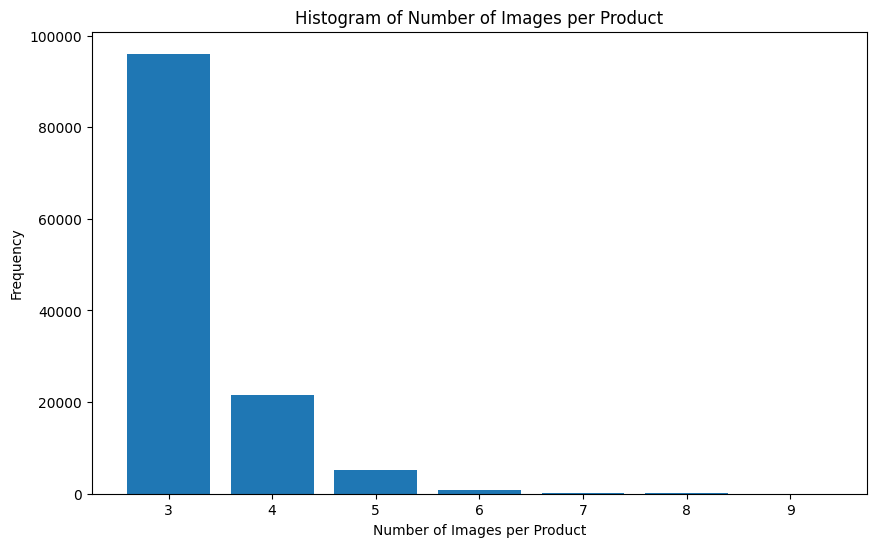

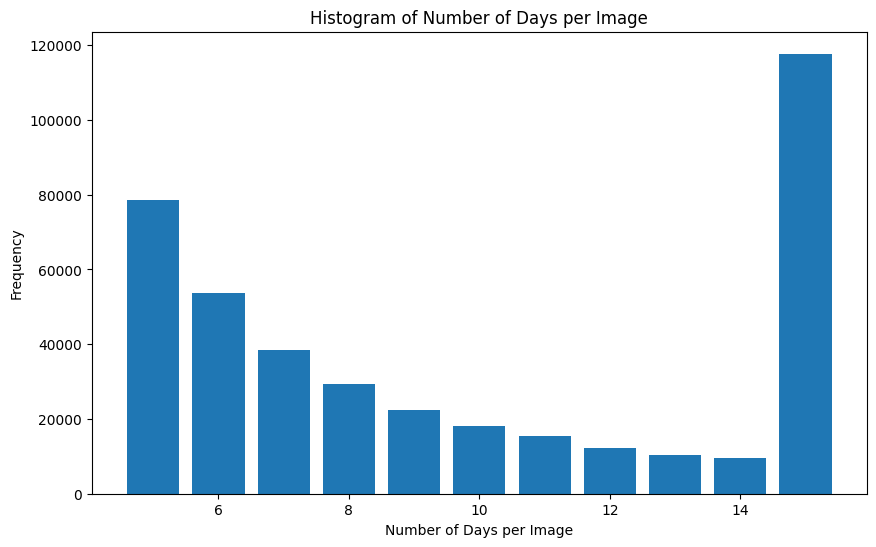

(Counter({4: 21480, 3: 96046, 5: 5125, 6: 739, 7: 173, 8: 58, 9: 6}),
 Counter({10: 18049,
          5: 78667,
          12: 12270,
          7: 38430,
          6: 53652,
          15: 117735,
          9: 22365,
          14: 9436,
          13: 10344,
          8: 29325,
          11: 15573}))

In [ ]:
display_stats(train_stats)

In [ ]:
random.seed(42)

print(len(train_stats))
sampled_train_stats = {}
sampled_test_stats = {}
sampled_train_images = []
sampled_test_images = []
for product in train_stats:
  if random.random() < 0.1:
    if random.random() < 0.8:
      sampled_train_stats[product] = train_stats[product]
      sampled_train_images += list(train_stats[product].keys())
    else:
      sampled_test_stats[product] = train_stats[product]
      sampled_test_images += list(train_stats[product].keys())
print(len(sampled_train_stats))
print(len(sampled_train_images))
print(len(sampled_test_stats))
print(len(sampled_test_images))

123627
9926
32619
2433
7934


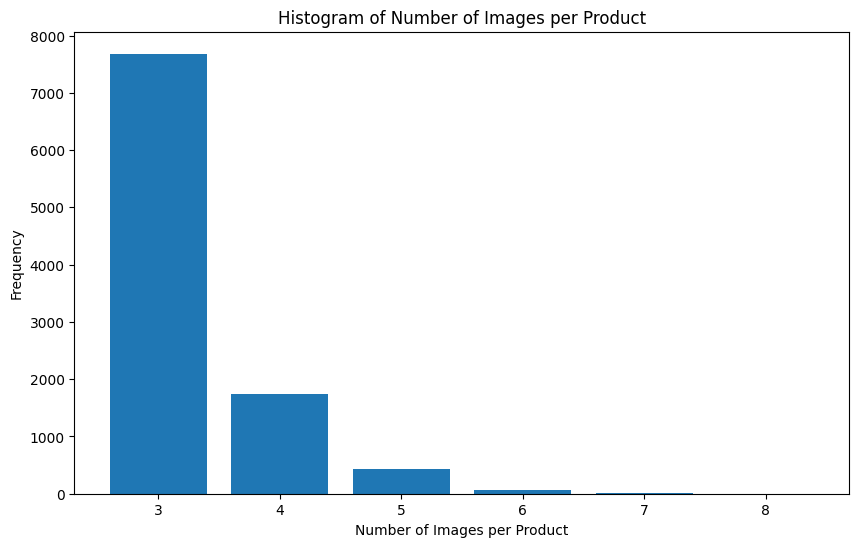

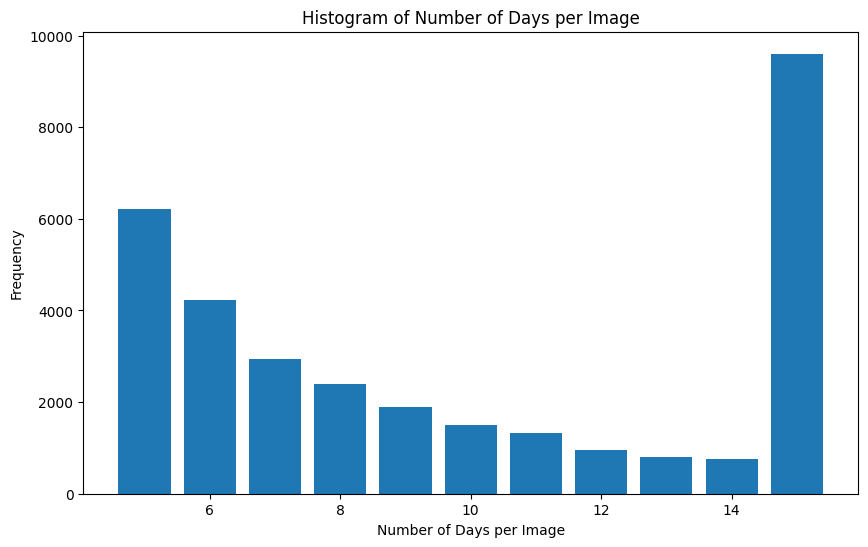

(Counter({3: 7683, 4: 1740, 5: 426, 6: 62, 7: 12, 8: 3}),
 Counter({5: 6211,
          7: 2941,
          15: 9604,
          9: 1887,
          6: 4236,
          13: 800,
          8: 2392,
          12: 958,
          11: 1320,
          10: 1504,
          14: 766}))

In [ ]:
display_stats(sampled_train_stats)

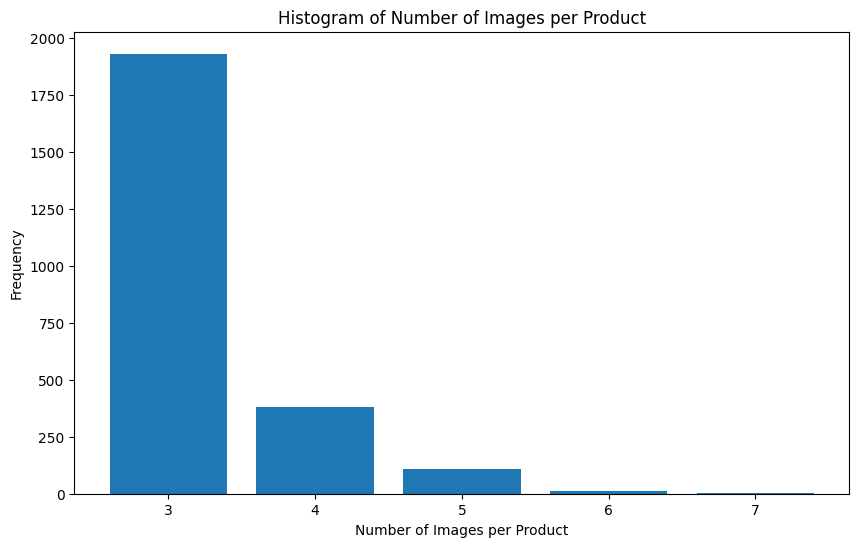

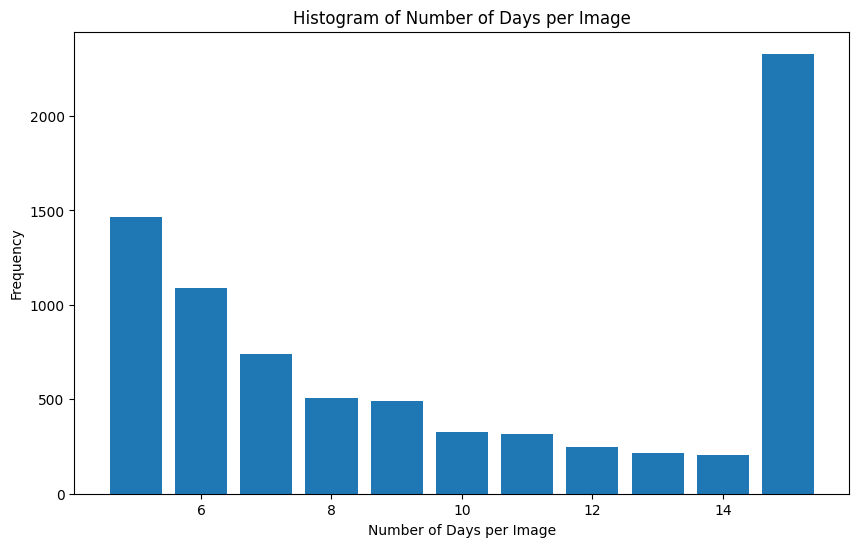

(Counter({3: 1932, 4: 381, 6: 10, 5: 108, 7: 2}),
 Counter({15: 2330,
          5: 1465,
          6: 1090,
          10: 325,
          11: 317,
          8: 509,
          9: 491,
          13: 214,
          7: 739,
          12: 250,
          14: 204}))

In [ ]:
display_stats(sampled_test_stats)

In [ ]:
sampled_train_df = train_df[train_df['image_name'].isin(sampled_train_images)]
sampled_test_df = train_df[train_df['image_name'].isin(sampled_test_images)]
print(len(sampled_train_df), len(sampled_test_df))

545816 138968


In [ ]:
sampled_train_df.to_csv('sampled_train.csv', index=False)
sampled_test_df.to_csv('sampled_test.csv', index=False)

# Load dataset

In [ ]:
import pandas as pd

In [ ]:
sampled_train_df = pd.read_csv('sampled_train.csv').dropna()
sampled_test_df = pd.read_csv('sampled_test.csv').dropna()

# Data stats

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print('~~~Training set~~~')
print('Number of elements:', len(sampled_train_df))
print('Average number of impressions:', sampled_train_df['num_impressions'].mean())
print('Impressions standard deviation:', sampled_train_df['num_impressions'].std())
print('Average number of clicks:', sampled_train_df['num_clicks'].mean())
print('Clicks standard deviation:', sampled_train_df['num_clicks'].std())
print()
print('~~~Test set~~~')
print('Number of elements:', len(sampled_test_df))
print('Average number of impressions:', sampled_test_df['num_impressions'].mean())
print('Impressions standard deviation:', sampled_test_df['num_impressions'].std())
print('Clicks standard deviation:', sampled_test_df['num_clicks'].mean())
print('Average number of clicks:', sampled_test_df['num_clicks'].std())

~~~Training set~~~


NameError: name 'sampled_train_df' is not defined

## Training set

In [ ]:
num_impressions = sampled_train_df['num_impressions'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(list(num_impressions.keys()), list(num_impressions.values))
plt.xlabel("Number of Impressions")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Impressions")
plt.show()

num_clicks = sampled_train_df['num_clicks'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(list(num_clicks.keys()), list(num_clicks.values))
plt.xlabel("Number of Clicks")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Clicks")
plt.show()

In [ ]:
num_impressions = sampled_train_df['num_impressions'].value_counts()
num_impressions = {k: v for k, v in num_impressions.items() if v < 1000}
plt.figure(figsize=(10, 6))
plt.bar(list(num_impressions.keys()), list(num_impressions.values()))
plt.xlabel("Number of Impressions")
plt.ylabel("Frequency")
plt.title(f"Histogram of Number of Impressions Above {min(num_impressions.keys())}")
plt.show()

num_clicks = sampled_train_df['num_clicks'].value_counts()
num_clicks = {k: v for k, v in num_clicks.items() if v < 1000}
plt.figure(figsize=(10, 6))
plt.bar(list(num_clicks.keys()), list(num_clicks.values()))
plt.xlabel("Number of Clicks")
plt.ylabel("Frequency")
plt.title(f"Histogram of Number of Clicks Above {min(num_clicks.keys())}")
plt.show()

In [ ]:
# Find good cutoffs for classification bucketing
print(sum(sampled_train_df[sampled_train_df['num_impressions'] < 3].value_counts()))
print(sum(sampled_train_df[(3 < sampled_train_df['num_impressions']) & (sampled_train_df['num_impressions'] < 6)].value_counts()))
print(sum(sampled_train_df[(6 < sampled_train_df['num_impressions']) & (sampled_train_df['num_impressions'] < 10)].value_counts()))
print(sum(sampled_train_df[(10 < sampled_train_df['num_impressions']) & (sampled_train_df['num_impressions'] < 15)].value_counts()))
print(sum(sampled_train_df[(15 < sampled_train_df['num_impressions']) & (sampled_train_df['num_impressions'] < 25)].value_counts()))
print(sum(sampled_train_df[(25 < sampled_train_df['num_impressions']) & (sampled_train_df['num_impressions'] < 50)].value_counts()))
print(sum(sampled_train_df[50 < sampled_train_df['num_impressions']].value_counts()))

In [ ]:
# Find good cutoffs for classification bucketing
print(sum(sampled_train_df[sampled_train_df['num_clicks'] < 1].value_counts()))
print(sum(sampled_train_df[sampled_train_df['num_clicks'] > 1].value_counts()))

## Test set

In [ ]:
num_impressions = sampled_test_df['num_impressions'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(list(num_impressions.keys()), list(num_impressions.values))
plt.xlabel("Number of Impressions")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Impressions")
plt.show()

num_clicks = sampled_test_df['num_clicks'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(list(num_clicks.keys()), list(num_clicks.values))
plt.xlabel("Number of Clicks")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Clicks")
plt.show()

In [ ]:
num_impressions = sampled_test_df['num_impressions'].value_counts()
num_impressions = {k: v for k, v in num_impressions.items() if v < 1000}
plt.figure(figsize=(10, 6))
plt.bar(list(num_impressions.keys()), list(num_impressions.values()))
plt.xlabel("Number of Impressions")
plt.ylabel("Frequency")
plt.title(f"Histogram of Number of Impressions Above {min(num_impressions.keys())}")
plt.show()

num_clicks = sampled_test_df['num_clicks'].value_counts()
num_clicks = {k: v for k, v in num_clicks.items() if v < 1000}
plt.figure(figsize=(10, 6))
plt.bar(list(num_clicks.keys()), list(num_clicks.values()))
plt.xlabel("Number of Clicks")
plt.ylabel("Frequency")
plt.title(f"Histogram of Number of Clicks Above {min(num_clicks.keys())}")
plt.show()

In [ ]:
# Use the same cutoffs for classification bucketing
print(sum(sampled_test_df[sampled_test_df['num_impressions'] < 3].value_counts()))
print(sum(sampled_test_df[(3 < sampled_test_df['num_impressions']) & (sampled_test_df['num_impressions'] < 6)].value_counts()))
print(sum(sampled_test_df[(6 < sampled_test_df['num_impressions']) & (sampled_test_df['num_impressions'] < 10)].value_counts()))
print(sum(sampled_test_df[(10 < sampled_test_df['num_impressions']) & (sampled_test_df['num_impressions'] < 15)].value_counts()))
print(sum(sampled_test_df[(15 < sampled_test_df['num_impressions']) & (sampled_test_df['num_impressions'] < 25)].value_counts()))
print(sum(sampled_test_df[(25 < sampled_test_df['num_impressions']) & (sampled_test_df['num_impressions'] < 50)].value_counts()))
print(sum(sampled_test_df[50 < sampled_test_df['num_impressions']].value_counts()))

NameError: name 'sampled_test_df' is not defined

In [ ]:
# Find good cutoffs for classification bucketing
print(sum(sampled_test_df[sampled_test_df['num_clicks'] < 1].value_counts()))
print(sum(sampled_test_df[sampled_test_df['num_clicks'] > 1].value_counts()))

# Dataset Loader

In [ ]:
import pickle
from torch.utils.data import Dataset
import numpy as np
import pandas as pd

class AdsDataset(Dataset):
    def __init__(self, split, embedding, first_day_only=False):
        """
        Args:
            split (str): 'train' or 'test' to determine which subset to load.
            embedding_type (str): 'resnet' or 'openclip' to determine which
              embedding to use.
            first_day_only (bool): If True, only use the first day of each
              product.
        """
        self.split = split
        if embedding == 'resnet':
          self.embedding_size = 2048
        else:
          self.embedding_size = 512
        self.data = []

        # Load the label dictionary
        df = pd.read_csv(f'sampled_{split}.csv')
        with open(f'{split}_{embedding}_embeddings.pkl', 'rb') as f:
          self.image_embeddings = pickle.load(f)


        images_seen = set()
        for i, row in df.iterrows():
          if first_day_only:
            if row['image_name'] in images_seen:
              continue
            images_seen.add(row['image_name'])

          impressions_bucket = -1
          if row['num_impressions'] < 3:
            impressions_bucket = 0
          elif row['num_impressions'] < 6:
            impressions_bucket = 1
          elif row['num_impressions'] < 10:
            impressions_bucket = 2
          elif row['num_impressions'] < 15:
            impressions_bucket = 3
          elif row['num_impressions'] < 25:
            impressions_bucket = 4
          elif row['num_impressions'] < 50:
            impressions_bucket = 5
          else:
            impressions_bucket = 6

          clicks_bucket = 0 if row['num_clicks'] < 1 else 1

          self.data.append((
              self.image_embeddings[row['image_name']], row['displayed_date'],
              row['num_impressions'], impressions_bucket, row['num_clicks'],
              clicks_bucket))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
# resnet_train = AdsDataset('train', 'resnet')
# openclip_train = AdsDataset('train', 'openclip')
# resnet_test = AdsDataset('test', 'resnet')
# openclip_test = AdsDataset('test', 'openclip')

first_day_resnet_train = AdsDataset('train', 'resnet', first_day_only=True)
first_day_openclip_train = AdsDataset('train', 'openclip', first_day_only=True)
first_day_resnet_test = AdsDataset('test', 'resnet', first_day_only=True)
first_day_openclip_test = AdsDataset('test', 'openclip', first_day_only=True)

In [ ]:
print('Full dataset:')
print(len(resnet_train))
print(len(openclip_train))
print(len(resnet_test))
print(len(openclip_test))

print('First day only:')
print(len(first_day_resnet_train))
print(len(first_day_openclip_train))
print(len(first_day_resnet_test))
print(len(first_day_openclip_test))

Full dataset:
545816
545816
138968
138968
First day only:
31870
31870
7878
7878


# Model definitions

## Regression models

In [ ]:
from torch import nn

In [ ]:
class ResNetRegressionModel(nn.Module):
  def __init__(self, num_outputs):
    super().__init__()
    self.l1 = nn.Linear(2048, 512)
    self.r1 = nn.ReLU()
    self.d1 = nn.Dropout(0.1)
    self.l2 = nn.Linear(512, 128)
    self.r2 = nn.ReLU()
    self.d2 = nn.Dropout(0.1)
    self.l3 = nn.Linear(128, 32)
    self.r3 = nn.ReLU()
    self.d3 = nn.Dropout(0.1)
    self.l4 = nn.Linear(32, num_outputs)

  def forward(self, x):
    h1 = self.d1(self.r1(self.l1(x)))
    h2 = self.d2(self.r2(self.l2(h1)))
    h3 = self.d3(self.r3(self.l3(h2)))
    logits = self.l4(h3)
    return logits

class OpenClipRegressionModel(nn.Module):
  def __init__(self, num_outputs):
    super().__init__()
    # self.l1 = nn.Linear(512, 128)
    self.l1 = nn.Linear(513, num_outputs)
    self.r1 = nn.ReLU()
    self.d1 = nn.Dropout(0.1)
    # self.l2 = nn.Linear(128, 32)
    # self.r2 = nn.ReLU()
    # self.d2 = nn.Dropout(0.1)
    # self.l3 = nn.Linear(32, num_outputs)

  def forward(self, x):
    return self.d1(self.r1(self.l1(x)))
    h1 = self.d1(self.r1(self.l1(x)))
    h2 = self.d2(self.r2(self.l2(h1)))
    logits = self.l3(h2)
    return logits

## Classification models

In [ ]:
max_impressions, max_clicks = 0, 0
for split in (resnet_train, resnet_test):
  for _, _, num_impressions, num_clicks in split:
    max_impressions = max(max_impressions, num_impressions)
    max_clicks = max(max_clicks, num_clicks)

ValueError: too many values to unpack (expected 4)

# Experiments

## Baselines

In [ ]:
import numpy as np
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

In [ ]:
avg_train_num_impressions = sampled_train_df['num_impressions'].mean()
baseline_train_num_impressions_rms = np.sqrt(np.mean(np.square(sampled_train_df['num_impressions'] - avg_train_num_impressions)))
avg_test_num_impressions = sampled_test_df['num_impressions'].mean()
baseline_test_num_impressions_rms = np.sqrt(np.mean(np.square(sampled_test_df['num_impressions'] - avg_test_num_impressions)))
print(f'Baseline train num impressions RMSE: {baseline_train_num_impressions_rms}')
print(f'Baseline test num impressions RMSE: {baseline_test_num_impressions_rms}')

avg_train_num_clicks = sampled_train_df['num_clicks'].mean()
baseline_train_num_clicks_rms = np.sqrt(np.mean(np.square(sampled_train_df['num_clicks'] - avg_train_num_clicks)))
avg_test_num_clicks = sampled_test_df['num_clicks'].mean()
baseline_test_num_clicks_rms = np.sqrt(np.mean(np.square(sampled_test_df['num_clicks'] - avg_test_num_clicks)))
print(f'Baseline train num clicks RMSE: {baseline_train_num_clicks_rms}')
print(f'Baseline test num clicks RMSE: {baseline_test_num_clicks_rms}')

Baseline train num impressions RMSE: 50.99369612088094
Baseline test num impressions RMSE: 74.00345816078955
Baseline train num clicks RMSE: 1.6392765195394485
Baseline test num clicks RMSE: 1.9416030308592385


## ML regression experiments

### Experiment setup

In [ ]:
def train_and_test_model(model_type, train, test, num_epochs, batch_size, label_names, learning_rate=1e-3, data_clip=None, verbose=True):
  if data_clip:
    train = train[:data_clip]
    test = test[:data_clip]

  train_loader = DataLoader(train, batch_size, shuffle=True, num_workers=2)
  test_loader = DataLoader(test, batch_size, shuffle=False, num_workers=2)

  if model_type == 'resnet':
    model = ResNetModel(len(label_names))
  elif model_type == 'openclip':
    model = OpenClipModel(len(label_names))
  else:
    raise ValueError('Invalid model type')

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model = model.to(device)

  # Loss function and optimizer
  criterion = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  # Training Loop
  train_losses, train_accs = [], []
  test_losses, test_accs = [], []
  for epoch in range(num_epochs) if verbose else tqdm(range(num_epochs)):
    model.train()
    train_loss, correct, total = 0.0, 0, 0

    if verbose:
      print('Training:')
    for image_embeddings, display_dates, num_impressions, num_clicks in tqdm(train_loader) if verbose else train_loader:
      train_inputs = torch.cat([image_embeddings, torch.unsqueeze(display_dates, 1)], dim=1)
      train_labels = []
      if 'impressions' in label_names:
        train_labels.append(num_impressions)
      if 'clicks' in label_names:
        train_labels.append(num_clicks)
      train_labels = torch.stack(train_labels, dim=1)
      train_inputs, train_labels = train_inputs.to(device), train_labels.to(device, dtype=torch.float)  # Ensure labels are floats

      optimizer.zero_grad()
      # print(train_inputs)
      train_outputs = model(train_inputs)
      # print(train_outputs)
      # print(train_labels)

      loss = criterion(train_outputs, train_labels)
      # print(loss)
      # 1/0
      loss.backward()
      optimizer.step()

      train_loss += loss.item()
      # _, predicted = outputs.max(1)
      # total += train_labels.size(0)
      # correct += predicted.eq(train_labels).sum().item()

    train_loss /= len(train_loader)
    # train_acc = correct / total
    train_losses.append(train_loss)
    # train_accs.append(train_acc)

    # Test Loop
    model.eval()
    test_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
      if verbose:
        print('Testing:')
      for image_embeddings, display_dates, num_impressions, num_clicks in tqdm(test_loader) if verbose else test_loader:
        test_inputs = torch.cat([image_embeddings, torch.unsqueeze(display_dates, 1)], dim=1)
        test_labels = []
        if 'impressions' in label_names:
          test_labels.append(num_impressions)
        if 'clicks' in label_names:
          test_labels.append(num_clicks)
        test_labels = torch.stack(test_labels, dim=1)
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device, dtype=torch.float)  # Ensure labels are floats
        test_outputs = model(test_inputs)
        loss = criterion(test_outputs, test_labels)

        test_loss += loss.item()
        # _, predicted = outputs.max(1)
        # total += test_labels.size(0)
        # correct += predicted.eq(test_labels).sum().item()

    test_loss /= len(test_loader)
    # val_acc = correct / total
    test_losses.append(test_loss)
    # val_accs.append(val_acc)

    if verbose:
      print(f"Epoch {epoch+1}/{num_epochs} - "
            f"Train Loss: {train_loss:.4f}, Train Acc: {-1} - "
            f"Test Loss: {test_loss:.4f}, Test Acc: {-1}")

  return model, train_losses, train_accs, test_losses, test_accs

### Experiment 1: predict impressions

Training:


100%|██████████| 125/125 [00:00<00:00, 128.34it/s]


Testing:


100%|██████████| 31/31 [00:00<00:00, 82.82it/s] 


Epoch 1/10 - Train Loss: 1998.8004, Train Acc: -1 - Test Loss: 3357.3642, Test Acc: -1
Training:


100%|██████████| 125/125 [00:00<00:00, 139.32it/s]


Testing:


100%|██████████| 31/31 [00:00<00:00, 80.73it/s] 


Epoch 2/10 - Train Loss: 1949.3492, Train Acc: -1 - Test Loss: 3335.6261, Test Acc: -1
Training:


100%|██████████| 125/125 [00:00<00:00, 141.60it/s]


Testing:


100%|██████████| 31/31 [00:00<00:00, 76.67it/s] 


Epoch 3/10 - Train Loss: 1945.0251, Train Acc: -1 - Test Loss: 3332.4682, Test Acc: -1
Training:


100%|██████████| 125/125 [00:00<00:00, 138.93it/s]


Testing:


100%|██████████| 31/31 [00:00<00:00, 82.83it/s] 


Epoch 4/10 - Train Loss: 1941.9812, Train Acc: -1 - Test Loss: 3331.5913, Test Acc: -1
Training:


100%|██████████| 125/125 [00:00<00:00, 138.33it/s]


Testing:


100%|██████████| 31/31 [00:00<00:00, 82.50it/s] 


Epoch 5/10 - Train Loss: 1936.4993, Train Acc: -1 - Test Loss: 3329.8333, Test Acc: -1
Training:


100%|██████████| 125/125 [00:00<00:00, 138.75it/s]


Testing:


100%|██████████| 31/31 [00:00<00:00, 80.77it/s] 


Epoch 6/10 - Train Loss: 1933.3327, Train Acc: -1 - Test Loss: 3329.2843, Test Acc: -1
Training:


100%|██████████| 125/125 [00:01<00:00, 100.72it/s]


Testing:


100%|██████████| 31/31 [00:00<00:00, 46.43it/s]


Epoch 7/10 - Train Loss: 1931.1803, Train Acc: -1 - Test Loss: 3329.1525, Test Acc: -1
Training:


100%|██████████| 125/125 [00:01<00:00, 84.21it/s] 


Testing:


100%|██████████| 31/31 [00:00<00:00, 80.73it/s] 


Epoch 8/10 - Train Loss: 1926.9151, Train Acc: -1 - Test Loss: 3329.2287, Test Acc: -1
Training:


100%|██████████| 125/125 [00:00<00:00, 138.52it/s]


Testing:


100%|██████████| 31/31 [00:00<00:00, 79.07it/s] 


Epoch 9/10 - Train Loss: 1937.7846, Train Acc: -1 - Test Loss: 3330.5179, Test Acc: -1
Training:


100%|██████████| 125/125 [00:00<00:00, 138.78it/s]


Testing:


100%|██████████| 31/31 [00:00<00:00, 79.31it/s] 


Epoch 10/10 - Train Loss: 1924.1940, Train Acc: -1 - Test Loss: 3330.6053, Test Acc: -1


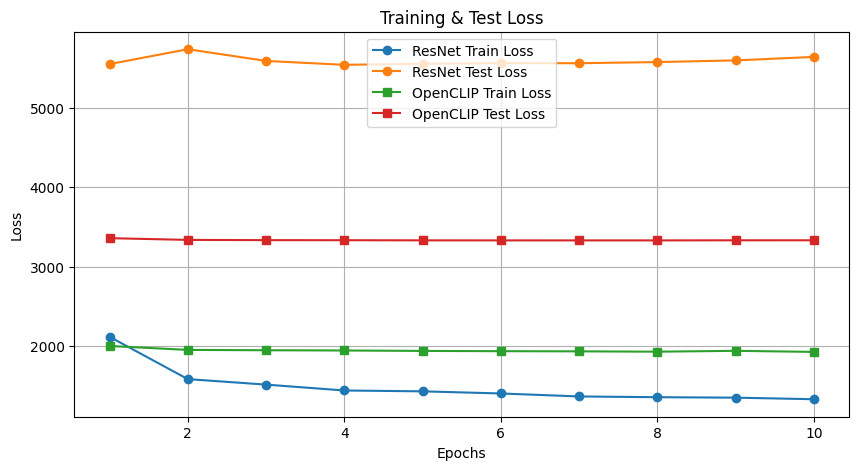

In [ ]:
num_epochs = 10
batch_size = 256
# resnet_impression_model, resnet_impression_train_losses, resnet_impression_train_accs, resnet_impression_test_losses, resnet_impression_test_accs = train_and_test_model('resnet', resnet_train, resnet_test, num_epochs, batch_size, ['impressions',])
openclip_impression_model, openclip_impression_train_losses, openclip_impression_train_accs, openclip_impression_test_losses, openclip_impression_test_accs = train_and_test_model('openclip', openclip_train, openclip_test, num_epochs, batch_size, ['impressions',])

# Plot Loss and Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), resnet_impression_train_losses, label="ResNet Train Loss", marker='o')
plt.plot(range(1, num_epochs+1), resnet_impression_test_losses, label="ResNet Test Loss", marker='o')
plt.plot(range(1, num_epochs+1), openclip_impression_train_losses, label="OpenCLIP Train Loss", marker='s')
plt.plot(range(1, num_epochs+1), openclip_impression_test_losses, label="OpenCLIP Test Loss", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Test Loss")
plt.legend()
plt.grid()
plt.show()

### Experiment 2: predict clicks

100%|██████████| 1000/1000 [19:58<00:00,  1.20s/it]


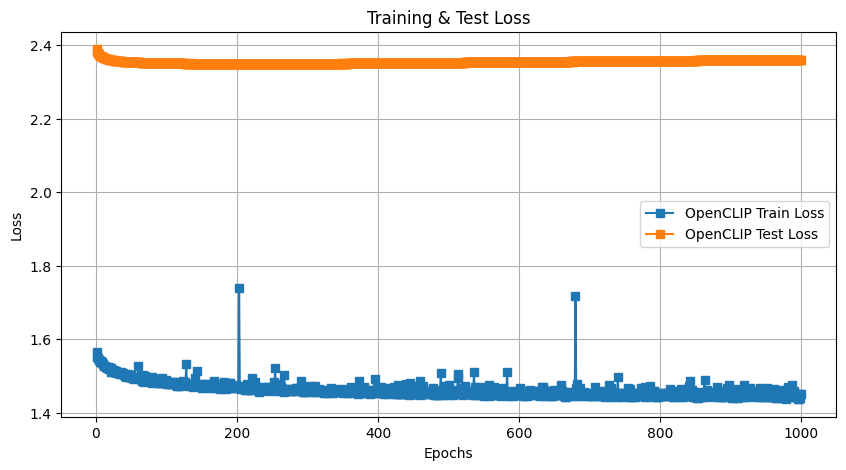

In [ ]:
num_epochs = 1000
batch_size = 256
# resnet_clicks_model, resnet_clicks_train_losses, resnet_clicks_train_accs, resnet_clicks_test_losses, resnet_clicks_test_accs = train_and_test_model('resnet', resnet_train, resnet_test, num_epochs, batch_size, ['clicks',])
openclip_clicks_model, openclip_clicks_train_losses, openclip_clicks_train_accs, openclip_clicks_test_losses, openclip_clicks_test_accs = train_and_test_model('openclip', first_day_openclip_train, first_day_openclip_test, num_epochs, batch_size, ['clicks',], learning_rate=1e-5, verbose=False)

# Plot Loss and Accuracy
plt.figure(figsize=(10, 5))
# plt.plot(range(1, num_epochs+1), resnet_clicks_train_losses, label="ResNet Train Loss", marker='o')
# plt.plot(range(1, num_epochs+1), resnet_clicks_test_losses, label="ResNet Test Loss", marker='o')
plt.plot(range(1, num_epochs+1), openclip_clicks_train_losses, label="OpenCLIP Train Loss", marker='s')
plt.plot(range(1, num_epochs+1), openclip_clicks_test_losses, label="OpenCLIP Test Loss", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Test Loss")
plt.legend()
plt.grid()
plt.show()

In [ ]:
openclip_clicks_model.eval()
# train 9 is non-zero
# test 4 is non-zero
image_embeddings, day, impressions, clicks = first_day_openclip_train[9]
inputs = np.append(image_embeddings, day)
with torch.no_grad():
  output = openclip_clicks_model(torch.Tensor(inputs))
print(f'Expected: {clicks}, Predicted: {output}')

Expected: 1, Predicted: tensor([0.0659])


### Experiment 3: predict clicks and impressions

Training:


100%|██████████| 2133/2133 [00:13<00:00, 160.68it/s]


Testing:


  0%|          | 0/543 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([256, 1])) that is different to the input size (torch.Size([256, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
 98%|█████████▊| 534/543 [00:02<00:00, 243.62it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([216, 1])) that is different to the input size (torch.Size([216, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 543/543 [00:02<00:00, 210.57it/s]


Epoch 1/10 - Train Loss: 1306.1625, Train Acc: -1 - Test Loss: 5615.2699, Test Acc: -1
Training:


100%|██████████| 2133/2133 [00:13<00:00, 160.02it/s]


Testing:


100%|██████████| 543/543 [00:02<00:00, 211.60it/s]


Epoch 2/10 - Train Loss: 1288.9419, Train Acc: -1 - Test Loss: 5617.7202, Test Acc: -1
Training:


100%|██████████| 2133/2133 [00:12<00:00, 165.61it/s]


Testing:


100%|██████████| 543/543 [00:02<00:00, 197.16it/s]


Epoch 3/10 - Train Loss: 1283.9034, Train Acc: -1 - Test Loss: 5621.0567, Test Acc: -1
Training:


100%|██████████| 2133/2133 [00:14<00:00, 150.35it/s]


Testing:


100%|██████████| 543/543 [00:04<00:00, 133.91it/s]


Epoch 4/10 - Train Loss: 1277.6875, Train Acc: -1 - Test Loss: 5623.8358, Test Acc: -1
Training:


100%|██████████| 2133/2133 [00:13<00:00, 160.33it/s]


Testing:


100%|██████████| 543/543 [00:02<00:00, 212.41it/s]


Epoch 5/10 - Train Loss: 1275.5499, Train Acc: -1 - Test Loss: 5624.2623, Test Acc: -1
Training:


100%|██████████| 2133/2133 [00:13<00:00, 159.47it/s]


Testing:


100%|██████████| 543/543 [00:02<00:00, 213.03it/s]


Epoch 6/10 - Train Loss: 1273.6701, Train Acc: -1 - Test Loss: 5627.7137, Test Acc: -1
Training:


100%|██████████| 2133/2133 [00:13<00:00, 160.22it/s]


Testing:


100%|██████████| 543/543 [00:03<00:00, 170.43it/s]


Epoch 7/10 - Train Loss: 1272.9152, Train Acc: -1 - Test Loss: 5629.4209, Test Acc: -1
Training:


100%|██████████| 2133/2133 [00:13<00:00, 159.93it/s]


Testing:


100%|██████████| 543/543 [00:03<00:00, 180.99it/s]


Epoch 8/10 - Train Loss: 1272.2645, Train Acc: -1 - Test Loss: 5629.2116, Test Acc: -1
Training:


100%|██████████| 2133/2133 [00:13<00:00, 160.66it/s]


Testing:


100%|██████████| 543/543 [00:02<00:00, 207.67it/s]


Epoch 9/10 - Train Loss: 1270.3153, Train Acc: -1 - Test Loss: 5633.5438, Test Acc: -1
Training:


100%|██████████| 2133/2133 [00:13<00:00, 161.04it/s]


Testing:


100%|██████████| 543/543 [00:02<00:00, 202.48it/s]


Epoch 10/10 - Train Loss: 1269.4133, Train Acc: -1 - Test Loss: 5635.0352, Test Acc: -1


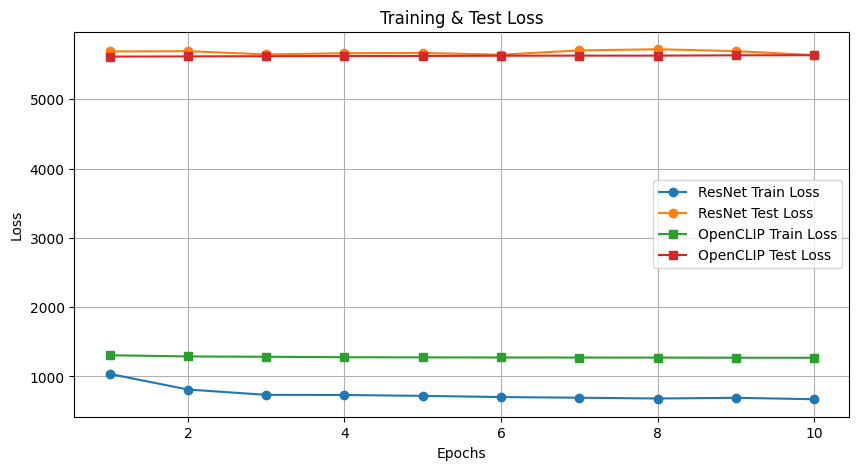

In [ ]:
num_epochs = 10
batch_size = 256
# resnet_impressions_clicks_model, resnet_impressions_clicks_train_losses, resnet_impressions_clicks_train_accs, resnet_impressions_clicks_test_losses, resnet_impressions_clicks_test_accs = train_and_test_model('resnet', resnet_train, resnet_test, num_epochs, batch_size, ['impressions', 'clicks'])
openclip_impressions_clicks_model, openclip_impressions_clicks_train_losses, openclip_impressions_clicks_train_accs, openclip_impressions_clicks_test_losses, openclip_impressions_clicks_test_accs = train_and_test_model('openclip', openclip_train, openclip_test, num_epochs, batch_size, ['impressions', 'clicks'])

# Plot Loss and Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), resnet_impressions_clicks_train_losses, label="ResNet Train Loss", marker='o')
plt.plot(range(1, num_epochs+1), resnet_impressions_clicks_test_losses, label="ResNet Test Loss", marker='o')
plt.plot(range(1, num_epochs+1), openclip_impressions_clicks_train_losses, label="OpenCLIP Train Loss", marker='s')
plt.plot(range(1, num_epochs+1), openclip_impressions_clicks_test_losses, label="OpenCLIP Test Loss", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Test Loss")
plt.legend()
plt.grid()
plt.show()

In [ ]:
image_embeddings1, _, imps, _ = resnet_train[100]
image_embeddings2, _, imps, _ = resnet_train[1]
print(image_embeddings1, imps)
print(image_embeddings2, imps)
resnet_model(torch.stack((torch.Tensor(image_embeddings1), torch.Tensor(image_embeddings2))))

[0.4188654  1.343819   1.0001379  ... 0.4443417  0.07917026 0.5663809 ] 9
[0.2250475  0.7683121  2.6716235  ... 0.07212014 0.73009926 0.17849647] 9


tensor([[13.0688],
        [13.0688]], grad_fn=<AddmmBackward0>)

## Random forests

### Dataset setup

In [ ]:
datasets = {
    # 'resnet_impressions_regression': (resnet_train, resnet_test),
    # 'openclip_impressions_regression': (openclip_train, openclip_test),
    'first_day_resnet_impressions_regression': (first_day_resnet_train, first_day_resnet_test),
    'first_day_openclip_impressions_regression': (first_day_openclip_train, first_day_openclip_test),
    # 'resnet_clicks_regression': (resnet_train, resnet_test),
    # 'openclip_clicks_regression': (openclip_train, openclip_test),
    'first_day_resnet_clicks_regression': (first_day_resnet_train, first_day_resnet_test),
    'first_day_openclip_clicks_regression': (first_day_openclip_train, first_day_openclip_test),

    # 'resnet_impressions_classification': (resnet_train, resnet_test),
    # 'openclip_impressions_classification': (openclip_train, openclip_test),
    'first_day_resnet_impressions_classification': (first_day_resnet_train, first_day_resnet_test),
    'first_day_openclip_impressions_classification': (first_day_openclip_train, first_day_openclip_test),
    # 'resnet_clicks_classification': (resnet_train, resnet_test),
    # 'openclip_clicks_classification': (openclip_train, openclip_test),
    'first_day_resnet_clicks_classification': (first_day_resnet_train, first_day_resnet_test),
    'first_day_openclip_clicks_classification': (first_day_openclip_train, first_day_openclip_test),
}

In [ ]:
def get_dataset(datasets, dataset_name, frac=None):
  train_dataset, test_dataset = datasets[dataset_name]
  x_train, y_train, x_test, y_test = [], [], [], []
  for dataset, x, y in ((train_dataset, x_train, y_train), (test_dataset, x_test, y_test)):
    for embedding, date, num_impressions, impressions_bucket, num_clicks, clicks_bucket in dataset:
      input = embedding
      if 'first_day' not in dataset_name:
        input = np.append(input, date)
      x.append(input)

      if 'impressions' in dataset_name:
        if 'regression' in dataset_name:
          y.append(num_impressions)
        else:
          y.append(impressions_bucket)
      elif 'clicks' in dataset_name:
        if 'regression' in dataset_name:
          y.append(num_clicks)
        else:
          y.append(clicks_bucket)
  x_train = np.array(x_train)
  np.random.shuffle(x_train)
  y_train = np.array(y_train)
  np.random.shuffle(y_train)
  x_test = np.array(x_test)
  np.random.shuffle(x_test)
  y_test = np.array(y_test)
  np.random.shuffle(y_test)
  if frac:
    x_train = x_train[:int(len(x_train) * frac)]
    y_train = y_train[:int(len(y_train) * frac)]
    x_test = x_test[:int(len(x_test) * frac)]
    y_test = y_test[:int(len(y_test) * frac)]
  return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [ ]:
import collections
import matplotlib.pyplot as plt

def analyze_dataset(datasets, dataset_name):
  x_train, y_train, x_test, y_test = get_dataset(datasets, dataset_name)
  print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

  y_train_counts = collections.Counter(y_train)
  x = list(y_train_counts.keys())
  y = list(y_train_counts.values())
  plt.figure(figsize=(10, 6))
  plt.bar(x, y)
  plt.xlabel("Train labels")
  plt.ylabel("Frequency")
  plt.title("Histogram of train labels")
  plt.show()

  y_test_counts = collections.Counter(y_test)
  x = list(y_test_counts.keys())
  y = list(y_test_counts.values())
  plt.figure(figsize=(10, 6))
  plt.bar(x, y)
  plt.xlabel("Test label")
  plt.ylabel("Frequency")
  plt.title("Histogram of test labels")
  plt.show()

(31870, 2048) (31870,) (7878, 2048) (7878,)


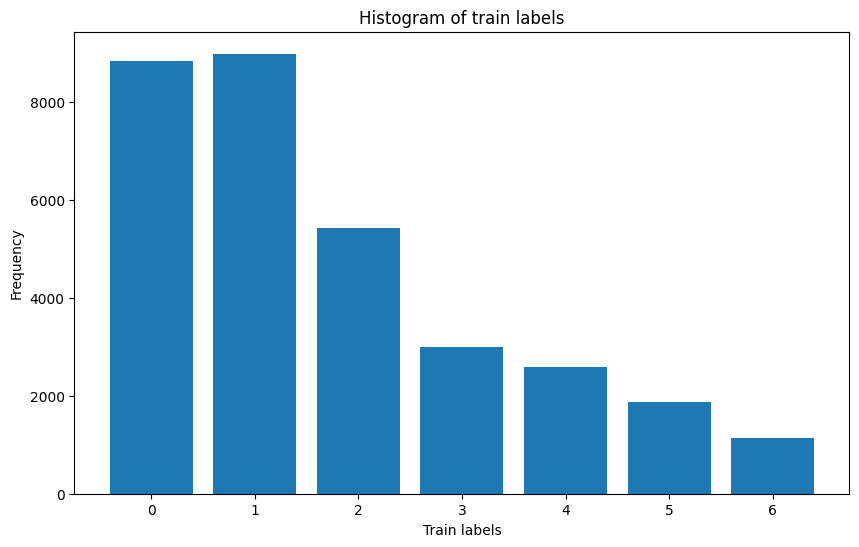

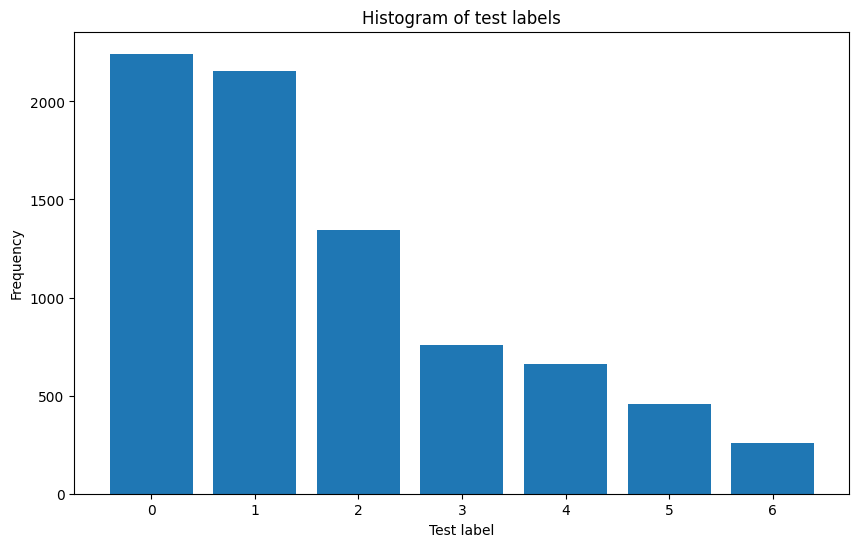

In [ ]:
x_train, y_train, x_test, y_test = get_dataset(datasets, 'first_day_resnet_impressions_classification', frac=0.1)
analyze_dataset(datasets, 'first_day_resnet_impressions_classification')

### Experiment setup

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

from sklearn.metrics import accuracy_score, mean_squared_error
import shap

In [ ]:
def train_models(datasets, dataset_names, frac=None):
  for dataset_name in dataset_names:
    print('Dataset:', dataset_name)

    x_train, y_train, x_test, y_test = get_dataset(datasets, dataset_name, frac)
    # if 'regression' in dataset_name:
    #   model = RandomForestRegressor(n_estimators=1, max_depth=10)
    # elif 'classification' in dataset_name:
      # model = RandomForestClassifier(n_estimators=1, max_depth=100)

    model = RandomForestClassifier(n_estimators=1, random_state=42)
    param_grid = {
        'n_estimators': [1, 2, 5],
        'max_depth': [5, 10, 25, 100, 250, 1000, 2500],
        'min_samples_split': [5, 10, 25, 50],
        'min_samples_leaf': [2, 4, 10, 25, 100],
        'max_features': ['sqrt', 'log2']
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    # 5. Fit GridSearchCV on training data
    grid_search.fit(x_train, y_train)
    print("Best hyperparameters:", grid_search.best_params_)
    print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

    # 6. Train best model on full training set
    model = grid_search.best_estimator_
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate RMSE if regression
    if 'regression' in dataset_name:
      train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
      test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
      print(f'Train RMSE: {train_rmse:.4f}')
      print(f'Test RMSE: {test_rmse:.4f}')
    elif 'classification' in dataset_name:
      baseline_train_acc = accuracy_score(y_train, np.zeros_like(y_train))
      baseline_test_acc = accuracy_score(y_test, np.zeros_like(y_test))
      print(f'Baseline train accuracy: {baseline_train_acc:.4f}')
      print(f'Baseline test accuracy: {baseline_test_acc:.4f}')
      train_acc = accuracy_score(y_train, y_train_pred)
      test_acc = accuracy_score(y_test, y_test_pred)
      print(f'Train Accuracy: {train_acc:.4f}')
      print(f'Test Accuracy: {test_acc:.4f}')

    # Use TreeExplainer and pass correct data
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(np.array(x_test))

    # Visualize for class 0, for example
    shap.summary_plot(shap_values[:, :, 0], np.array(x_test))

    return grid_search.cv_results_

Dataset: first_day_resnet_impressions_classification
Fitting 5 folds for each of 840 candidates, totalling 4200 fits
Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 100, 'min_samples_split': 5, 'n_estimators': 5}
Best cross-validated accuracy: 0.2839
Baseline train accuracy: 0.2777
Baseline test accuracy: 0.2847
Train Accuracy: 0.3439
Test Accuracy: 0.2780


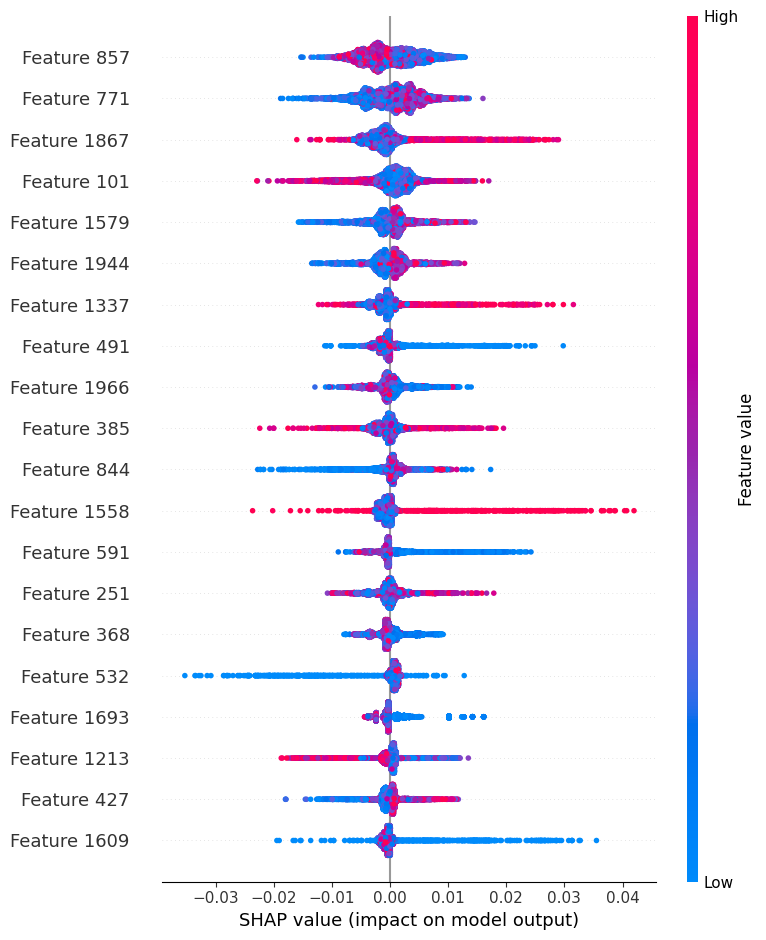

In [ ]:
cv_results = train_models(datasets, ['first_day_resnet_impressions_classification', 'first_day_openclip_impressions_classification'])

In [ ]:
pd.DataFrame(cv_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.752056,0.057709,0.027531,0.010990,1,sqrt,2,5,"{'max_depth': 1, 'max_features': 'sqrt', 'min_...",0.282240,0.282240,0.282083,0.282083,0.282083,0.282146,0.000077,1
1,0.472305,0.098550,0.012088,0.000353,1,sqrt,2,10,"{'max_depth': 1, 'max_features': 'sqrt', 'min_...",0.282240,0.282240,0.282083,0.282083,0.282083,0.282146,0.000077,1
2,0.426393,0.016787,0.012613,0.001481,1,sqrt,4,5,"{'max_depth': 1, 'max_features': 'sqrt', 'min_...",0.282240,0.282240,0.282083,0.282083,0.282083,0.282146,0.000077,1
3,0.421196,0.011078,0.014774,0.002348,1,sqrt,4,10,"{'max_depth': 1, 'max_features': 'sqrt', 'min_...",0.282240,0.282240,0.282083,0.282083,0.282083,0.282146,0.000077,1
4,0.416901,0.014348,0.014925,0.003194,1,sqrt,10,5,"{'max_depth': 1, 'max_features': 'sqrt', 'min_...",0.282240,0.282240,0.282083,0.282083,0.282083,0.282146,0.000077,1
5,0.600617,0.141390,0.022826,0.007875,1,sqrt,10,10,"{'max_depth': 1, 'max_features': 'sqrt', 'min_...",0.282240,0.282240,0.282083,0.282083,0.282083,0.282146,0.000077,1
6,0.404108,0.051076,0.022532,0.008735,1,log2,2,5,"{'max_depth': 1, 'max_features': 'log2', 'min_...",0.283339,0.282240,0.282083,0.282397,0.279573,0.281927,0.001255,7
7,0.384241,0.060632,0.020910,0.007275,1,log2,2,10,"{'max_depth': 1, 'max_features': 'log2', 'min_...",0.283339,0.282240,0.282083,0.282397,0.279573,0.281927,0.001255,7
8,0.243432,0.009517,0.014393,0.001421,1,log2,4,5,"{'max_depth': 1, 'max_features': 'log2', 'min_...",0.283339,0.282240,0.282083,0.282397,0.279573,0.281927,0.001255,7
9,0.268786,0.029031,0.013511,0.001122,1,log2,4,10,"{'max_depth': 1, 'max_features': 'log2', 'min_...",0.283339,0.282240,0.282083,0.282397,0.279573,0.281927,0.001255,7


### Experiment 1: First day clicks (regression)

In [ ]:
train_models(['first_day_resnet_clicks_classification', 'first_day_openclip_clicks_classification'])

### Experiment 1: Impressions

In [ ]:
train_models(['resnet_impressions_regression', 'openclip_impressions_regression'])

Dataset: resnet_impressions_regression


KeyError: 'resnet_impressions_regression'

### Experiment 2: Clicks (regression)

In [ ]:
train_models(['resnet_clicks_regression', 'openclip_clicks_regression'])

### Experiment 3: First day impressions (regression)

In [ ]:
train_models(['first_day_resnet_impressions_regression', 'first_day_openclip_impressions_regression'])

Dataset: first_day_resnet_impressions_regression


### Experiment 5: Impressions (classification)

In [ ]:
train_models(['resnet_impressions_classification', 'openclip_impressions_classification'])

### Experiment 6: Clicks (classification)

In [ ]:
train_models(['resnet_clicks_classification', 'openclip_clicks_classification'])

### Experiment 7: First day impressions (classification)

In [ ]:
train_models(['first_day_resnet_impressions_classification', 'first_day_openclip_impressions_classification'])

### Experiment 8: First day clicks (classification)

In [ ]:
train_models(['first_day_resnet_clicks_classification', 'first_day_openclip_clicks_classification'])

# Use early days to predict future performance

## Data set up

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('sampled_train.csv')
test_df = pd.read_csv('sampled_test.csv')

In [3]:
train_df

,product_name,image_name,displayed_date,num_impressions,num_clicks
0,e2dd629fc3d16128ab33d7195aecfaee,cf9874b32c8f63537d61f82419a42c3a.png,0,4,0
1,e2dd629fc3d16128ab33d7195aecfaee,cf9874b32c8f63537d61f82419a42c3a.png,1,9,1
2,e2dd629fc3d16128ab33d7195aecfaee,cf9874b32c8f63537d61f82419a42c3a.png,2,1,0
3,e2dd629fc3d16128ab33d7195aecfaee,cf9874b32c8f63537d61f82419a42c3a.png,3,3,1
4,e2dd629fc3d16128ab33d7195aecfaee,cf9874b32c8f63537d61f82419a42c3a.png,4,3,0
...,...,...,...,...,...
545811,9a7c823c553075e64b7a2e8d0ea8019b,3205846ecc6b7de3aea5fb3e4301a65f.png,0,3,0
545812,9a7c823c553075e64b7a2e8d0ea8019b,3205846ecc6b7de3aea5fb3e4301a65f.png,1,2,0
545813,9a7c823c553075e64b7a2e8d0ea8019b,3205846ecc6b7de3aea5fb3e4301a65f.png,2,3,0
545814,9a7c823c553075e64b7a2e8d0ea8019b,3205846ecc6b7de3aea5fb3e4301a65f.png,3,1,0


In [4]:
def clean_data(df):
  df['displayed_date'] += 1

  # Sort to ensure reproducibility — you can adjust this if needed
  df = df.sort_values(by=['image_name', 'displayed_date']).reset_index(drop=True)

  # Identify the first product_name associated with each image_name
  first_product_per_image = (
      df.groupby('image_name')['product_name']
      .first()
      .to_dict()
  )

  # Filter the DataFrame to only include rows with that first (product_name, image_name) pair
  df_filtered = df[df.apply(
      lambda row: first_product_per_image[row['image_name']] == row['product_name'],
      axis=1
  )]

  return df_filtered.reset_index(drop=True)

In [5]:
train_df = clean_data(train_df)
test_df = clean_data(test_df)
train_df

,product_name,image_name,displayed_date,num_impressions,num_clicks
0,9719d616491615abac60fe42257b9061,00067c5a5ca8566b4ff40b39a939e284.png,1,2,0
1,9719d616491615abac60fe42257b9061,00067c5a5ca8566b4ff40b39a939e284.png,2,10,0
2,9719d616491615abac60fe42257b9061,00067c5a5ca8566b4ff40b39a939e284.png,3,11,0
3,9719d616491615abac60fe42257b9061,00067c5a5ca8566b4ff40b39a939e284.png,4,13,0
4,9719d616491615abac60fe42257b9061,00067c5a5ca8566b4ff40b39a939e284.png,5,3,0
...,...,...,...,...,...
320998,4a9c2e7b33d595803703d41f464f9f0c,fffbbfa2e07c8688192a2e09ce9d38ae.png,11,5,0
320999,4a9c2e7b33d595803703d41f464f9f0c,fffbbfa2e07c8688192a2e09ce9d38ae.png,12,2,1
321000,4a9c2e7b33d595803703d41f464f9f0c,fffbbfa2e07c8688192a2e09ce9d38ae.png,13,3,1
321001,4a9c2e7b33d595803703d41f464f9f0c,fffbbfa2e07c8688192a2e09ce9d38ae.png,14,9,1


In [6]:
min_days = 5

In [7]:
def filter_images_with_min_days(df, min_days = 5):
  image_day_counts = df.groupby('image_name')['displayed_date'].nunique()
  valid_images = image_day_counts[image_day_counts >= min_days].index
  return df[df['image_name'].isin(valid_images)].reset_index(drop=True)

In [8]:
train_df = filter_images_with_min_days(train_df, min_days)
test_df = filter_images_with_min_days(test_df, min_days)
train_df

,product_name,image_name,displayed_date,num_impressions,num_clicks
0,9719d616491615abac60fe42257b9061,00067c5a5ca8566b4ff40b39a939e284.png,1,2,0
1,9719d616491615abac60fe42257b9061,00067c5a5ca8566b4ff40b39a939e284.png,2,10,0
2,9719d616491615abac60fe42257b9061,00067c5a5ca8566b4ff40b39a939e284.png,3,11,0
3,9719d616491615abac60fe42257b9061,00067c5a5ca8566b4ff40b39a939e284.png,4,13,0
4,9719d616491615abac60fe42257b9061,00067c5a5ca8566b4ff40b39a939e284.png,5,3,0
...,...,...,...,...,...
320998,4a9c2e7b33d595803703d41f464f9f0c,fffbbfa2e07c8688192a2e09ce9d38ae.png,11,5,0
320999,4a9c2e7b33d595803703d41f464f9f0c,fffbbfa2e07c8688192a2e09ce9d38ae.png,12,2,1
321000,4a9c2e7b33d595803703d41f464f9f0c,fffbbfa2e07c8688192a2e09ce9d38ae.png,13,3,1
321001,4a9c2e7b33d595803703d41f464f9f0c,fffbbfa2e07c8688192a2e09ce9d38ae.png,14,9,1


In [9]:
def get_image_features(df, days_features_cutoff = 3):
    # Compute CTR
    df['ctr'] = df['num_clicks'] / df['num_impressions']
    df = df[df['displayed_date'] <= days_features_cutoff]

    # Pivot impressions and clicks by day_number
    pivot_impressions = df.pivot(index='image_name', columns='displayed_date', values='num_impressions').add_prefix('impressions_day_')
    pivot_clicks = df.pivot(index='image_name', columns='displayed_date', values='num_clicks').add_prefix('clicks_day_')

    # Aggregated stats across initial days
    agg = df.groupby('image_name').agg(
        product_name=('product_name', 'first'),
        sum_impressions_3d=('num_impressions', 'sum'),
        mean_impressions_3d=('num_impressions', 'mean'),
        std_impressions_3d=('num_impressions', 'std'),
        sum_clicks_3d=('num_clicks', 'sum'),
        mean_ctr_3d=('ctr', 'mean'),
    )

    # Merge base + pivot features
    features = agg.join([pivot_impressions, pivot_clicks])

    for i in range(1, days_features_cutoff + 1):
      features[f'ctr_day_{i}'] = features[f'clicks_day_{i}'] / features[f'impressions_day_{i}']

    # Growth features
    features['growth_day_2'] = (features['impressions_day_2'] - features['impressions_day_1']) / features['impressions_day_1']
    features['growth_day_3'] = (features['impressions_day_3'] - features['impressions_day_2']) / features['impressions_day_2']

    return features.reset_index()

In [10]:
days_features_cutoff = 3
train_features_df = get_image_features(train_df, days_features_cutoff)
test_features_df = get_image_features(test_df, days_features_cutoff)
train_features_df

,image_name,product_name,sum_impressions_3d,mean_impressions_3d,std_impressions_3d,sum_clicks_3d,mean_ctr_3d,impressions_day_1,impressions_day_2,impressions_day_3,clicks_day_1,clicks_day_2,clicks_day_3,ctr_day_1,ctr_day_2,ctr_day_3,growth_day_2,growth_day_3
0,00067c5a5ca8566b4ff40b39a939e284.png,9719d616491615abac60fe42257b9061,23,7.666667,4.932883,0,0.000000,2,10,11,0,0,0,0.000000,0.000000,0.000000,4.000000,0.100000
1,000826cdbebf3a6b6d67f6bc71b07d4b.png,31f1ad0b82a63c29710f5e6443ecd85a,13,4.333333,0.577350,0,0.000000,5,4,4,0,0,0,0.000000,0.000000,0.000000,-0.200000,0.000000
2,000b7d8cfb7f79974204c3cf725bd693.png,05db51305a012480370cb4e202ef35fa,141,47.000000,36.373067,9,0.039138,14,41,86,0,1,8,0.000000,0.024390,0.093023,1.928571,1.097561
3,00115d7f555cde2ad68f31652386a8df.png,16fbf4369d52a780d25afad26334e12f,16,5.333333,0.577350,2,0.133333,5,6,5,1,0,1,0.200000,0.000000,0.200000,0.200000,-0.166667
4,001480f6d1c81460e08678120085572e.png,77304d6c8b37e1db13f10f66aab41d71,61,20.333333,5.507571,3,0.055556,15,26,20,1,0,2,0.066667,0.000000,0.100000,0.733333,-0.230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31865,fff55f3d84a8eecdd1cc6c974be807cc.png,b0e09f3e0d18cc6e6147b756f50f17f7,79,26.333333,2.081666,1,0.012346,28,27,24,0,1,0,0.000000,0.037037,0.000000,-0.035714,-0.111111
31866,fff5ec19978ec09bdc370c3b212e29ef.png,142fff05a1fc390bd5bb3eb0a20e4b1f,31,10.333333,1.527525,0,0.000000,12,10,9,0,0,0,0.000000,0.000000,0.000000,-0.166667,-0.100000
31867,fff8b6658aec2f7cdbac49b9cffa5c78.png,f754c911fd0401c9be3993234d509fbc,5,1.666667,1.154701,0,0.000000,1,1,3,0,0,0,0.000000,0.000000,0.000000,0.000000,2.000000
31868,fffa5e1c32f5bf031d392c56da6c6ca8.png,9abca203fcd13f819f7170004116c42a,14,4.666667,3.785939,1,0.111111,2,9,3,0,0,1,0.000000,0.000000,0.333333,3.500000,-0.666667


In [11]:
def add_product_level_features(df, features_df):
    # Compute total impressions and total clicks per image
    image_totals = df.groupby('image_name').agg(
        total_impressions=('num_impressions', 'sum'),
        total_clicks=('num_clicks', 'sum'),
        product_name=('product_name', 'first')
    )
    image_totals['ctr'] = image_totals['total_clicks'] / image_totals['total_impressions']
    image_totals = image_totals.reset_index()

    # Group by product to get product-level stats
    product_stats = image_totals.groupby('product_name').agg(
        num_images_for_product=('image_name', 'count'),
        product_avg_impressions=('total_impressions', 'mean'),
        product_avg_ctr=('ctr', 'mean'),
    )

    # Merge product stats into features_df
    features_with_context = features_df.merge(product_stats, on='product_name', how='left')

    return features_with_context

def add_target_variables(df_all, features_df):
    target = df_all.groupby('image_name').agg(
        total_impressions=('num_impressions', 'sum'),
        total_clicks=('num_clicks', 'sum')
    ).reset_index()

    target['total_ctr'] = target['total_clicks'] / target['total_impressions']

    return features_df.merge(target, on='image_name', how='left')

In [12]:
# train_features_df = add_product_level_features(train_df, train_features_df)
# test_features_df = add_product_level_features(test_df, test_features_df)
train_features_df = add_target_variables(train_df, train_features_df)
test_features_df = add_target_variables(test_df, test_features_df)
train_features_df

,image_name,product_name,sum_impressions_3d,mean_impressions_3d,std_impressions_3d,sum_clicks_3d,mean_ctr_3d,impressions_day_1,impressions_day_2,impressions_day_3,...,clicks_day_2,clicks_day_3,ctr_day_1,ctr_day_2,ctr_day_3,growth_day_2,growth_day_3,total_impressions,total_clicks,total_ctr
0,00067c5a5ca8566b4ff40b39a939e284.png,9719d616491615abac60fe42257b9061,23,7.666667,4.932883,0,0.000000,2,10,11,...,0,0,0.000000,0.000000,0.000000,4.000000,0.100000,39,0,0.000000
1,000826cdbebf3a6b6d67f6bc71b07d4b.png,31f1ad0b82a63c29710f5e6443ecd85a,13,4.333333,0.577350,0,0.000000,5,4,4,...,0,0,0.000000,0.000000,0.000000,-0.200000,0.000000,27,0,0.000000
2,000b7d8cfb7f79974204c3cf725bd693.png,05db51305a012480370cb4e202ef35fa,141,47.000000,36.373067,9,0.039138,14,41,86,...,1,8,0.000000,0.024390,0.093023,1.928571,1.097561,483,23,0.047619
3,00115d7f555cde2ad68f31652386a8df.png,16fbf4369d52a780d25afad26334e12f,16,5.333333,0.577350,2,0.133333,5,6,5,...,0,1,0.200000,0.000000,0.200000,0.200000,-0.166667,52,2,0.038462
4,001480f6d1c81460e08678120085572e.png,77304d6c8b37e1db13f10f66aab41d71,61,20.333333,5.507571,3,0.055556,15,26,20,...,0,2,0.066667,0.000000,0.100000,0.733333,-0.230769,185,10,0.054054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31865,fff55f3d84a8eecdd1cc6c974be807cc.png,b0e09f3e0d18cc6e6147b756f50f17f7,79,26.333333,2.081666,1,0.012346,28,27,24,...,1,0,0.000000,0.037037,0.000000,-0.035714,-0.111111,345,8,0.023188
31866,fff5ec19978ec09bdc370c3b212e29ef.png,142fff05a1fc390bd5bb3eb0a20e4b1f,31,10.333333,1.527525,0,0.000000,12,10,9,...,0,0,0.000000,0.000000,0.000000,-0.166667,-0.100000,144,2,0.013889
31867,fff8b6658aec2f7cdbac49b9cffa5c78.png,f754c911fd0401c9be3993234d509fbc,5,1.666667,1.154701,0,0.000000,1,1,3,...,0,0,0.000000,0.000000,0.000000,0.000000,2.000000,86,0,0.000000
31868,fffa5e1c32f5bf031d392c56da6c6ca8.png,9abca203fcd13f819f7170004116c42a,14,4.666667,3.785939,1,0.111111,2,9,3,...,0,1,0.000000,0.000000,0.333333,3.500000,-0.666667,20,2,0.100000


## Model training

In [ ]:
target_metrics = ['impressions', 'clicks', 'ctr']
target_metric_features = ['total_' + target_metric for target_metric in target_metrics]

### Baseline

In [ ]:
from sklearn.metrics import mean_squared_error

baseline_metrics = {}
for target_metric in target_metrics:
  avg_train_target_metric = train_features_df[f'total_{target_metric}'].mean()
  avg_test_target_metric = test_features_df[f'total_{target_metric}'].mean()
  print(f'Average total {target_metric}: Train - {avg_train_target_metric}, Test - {avg_test_target_metric}')
  train_mse = mean_squared_error(test_features_df[f'total_{target_metric}'], [avg_train_target_metric] * len(test_features_df))
  baseline_metrics[target_metric] = train_mse
  test_mse = mean_squared_error(test_features_df[f'total_{target_metric}'], [avg_test_target_metric] * len(test_features_df))
  print(f'Baseline MSE: average total train {target_metric} - {train_mse:.4f}, average total test {target_metric} - {test_mse:.4f}')

Average total impressions: Train - 165.69177910260433, Test - 170.02995684183804
Baseline MSE: average total train impressions - 664839.9925, average total test impressions - 664821.1728
Average total clicks: Train - 4.839002196422968, Test - 4.922949987306423
Baseline MSE: average total train clicks - 398.2483, average total test clicks - 398.2412
Average total ctr: Train - 0.030509594470565487, Test - 0.03027547090577625
Baseline MSE: average total train ctr - 0.0009, average total test ctr - 0.0009


### Modeling and evaluating functions

In [ ]:
def train_and_test_model(train_df, test_df):
  models = {}
  results = {}
  for target_metric in target_metrics:
    print('Target metric:', target_metric)
    x_train = train_df.drop(columns=['image_name', 'product_name'] + target_metric_features)
    y_train = train_df[f'total_{target_metric}']
    x_test = test_df.drop(columns=['image_name', 'product_name'] + target_metric_features)
    y_test = test_df[f'total_{target_metric}']

    model = LGBMRegressor()
    model.fit(x_train, y_train)
    models[target_metric] = model

    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    improvement = (mse - baseline_metrics[target_metric]) / baseline_metrics[target_metric]
    results[target_metric] = mse
  return models, results

### Manual features LightGBM

In [ ]:
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import shap
from sklearn.metrics import mean_squared_error

In [ ]:
models, manual_features_results = train_and_test_model(train_features_df, test_features_df)
for target_metric, mse in manual_features_results.items():
  print('MSE:', mse)
  improvement = (mse - baseline_metrics[target_metric]) / baseline_metrics[target_metric]
  print(f'Percent reduction from baseline: {improvement*100:.2f}%')
  print()

Target metric: impressions
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3051
[LightGBM] [Info] Number of data points in the train set: 31870, number of used features: 16
[LightGBM] [Info] Start training from score 165.691779
Target metric: clicks
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3051
[LightGBM] [Info] Number of data points in the train set: 31870, number of used features: 16
[LightGBM] [Info] Start training from score 4.839002
Target metric: ctr
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005430 seconds.
You can set `f

In [ ]:
model_shap_values = {}
for target_metric, model in models.items():
  print('Target metric:', target_metric)
  x_train = train_features_df.drop(columns=['image_name', 'product_name'] + target_metric_features)
  explainer = shap.Explainer(model, x_train)
  shap_values = explainer(x_train, check_additivity=False)
  model_shap_values[target_metric] = shap_values
  print()

Target metric: impressions


 99%|===================| 31697/31870 [01:17<00:00]       

Target metric: clicks


100%|===================| 31831/31870 [01:23<00:00]       

Target metric: ctr


100%|===================| 31741/31870 [02:05<00:00]       

Target metric: impressions


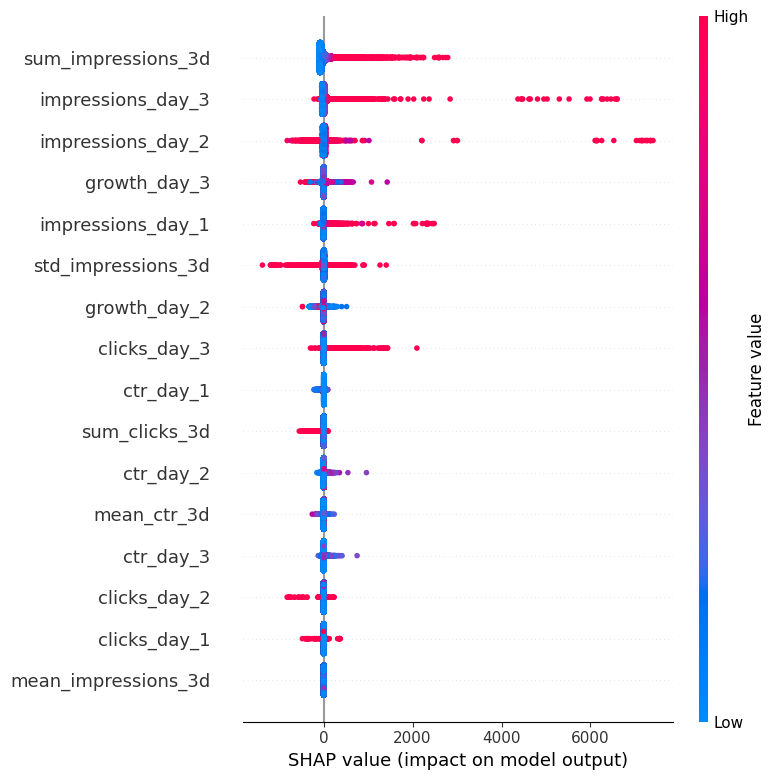

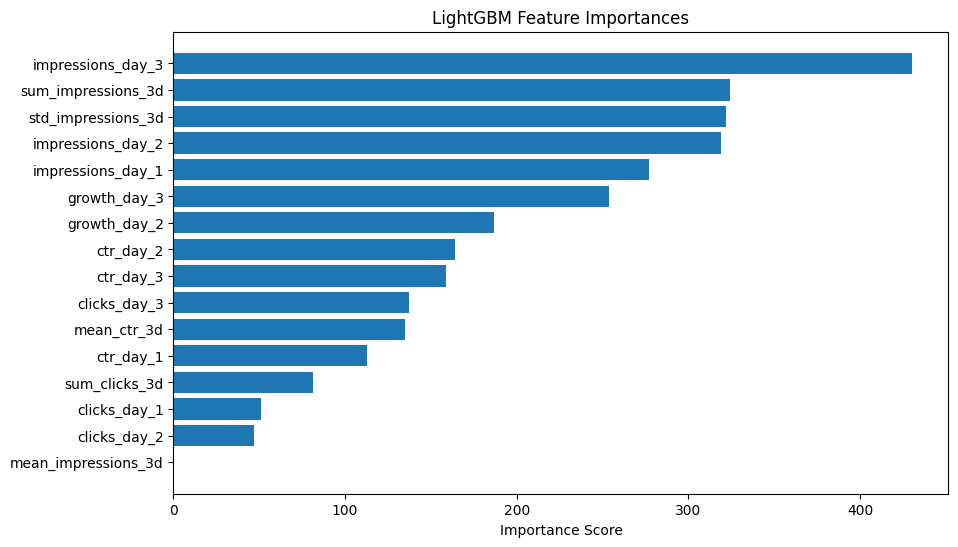


Target metric: clicks


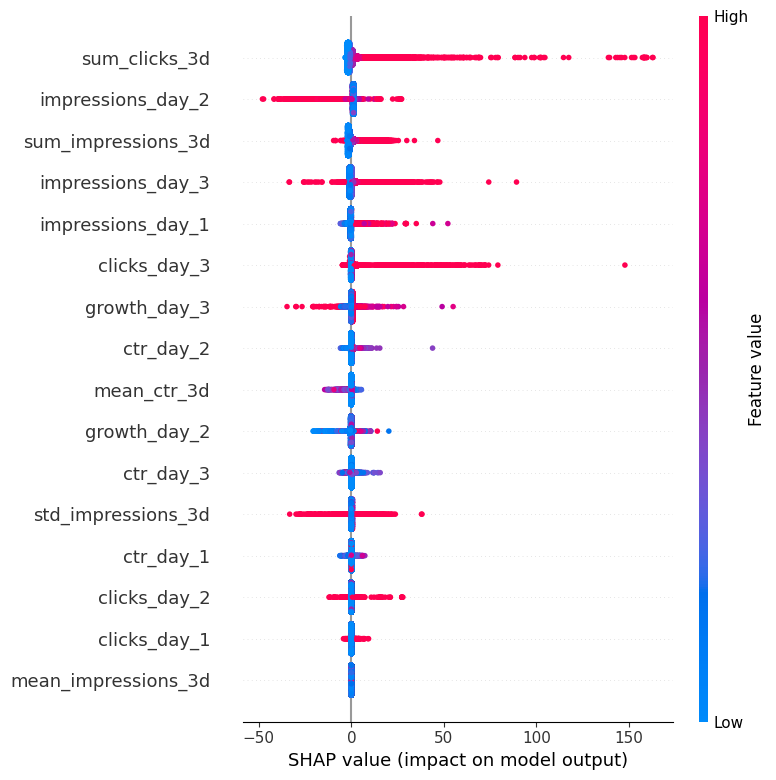

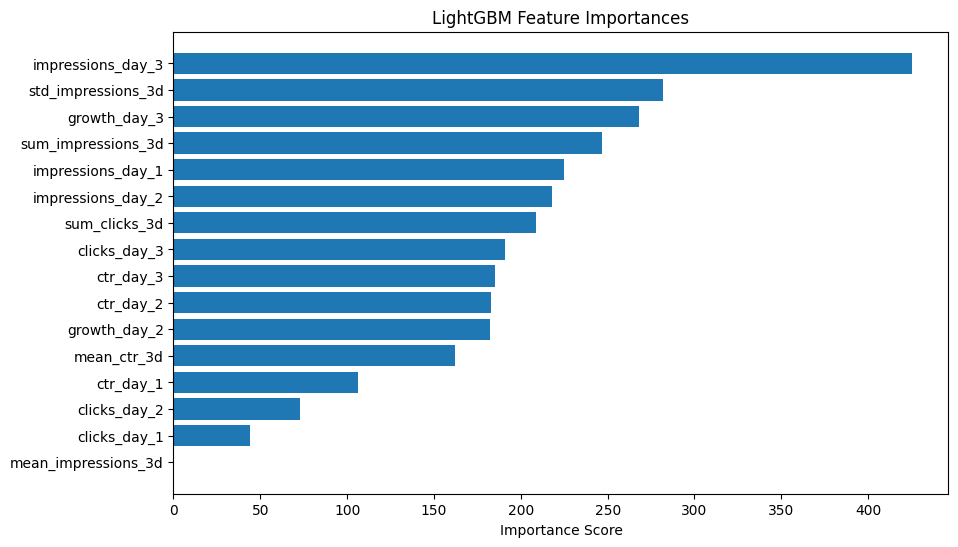


Target metric: ctr


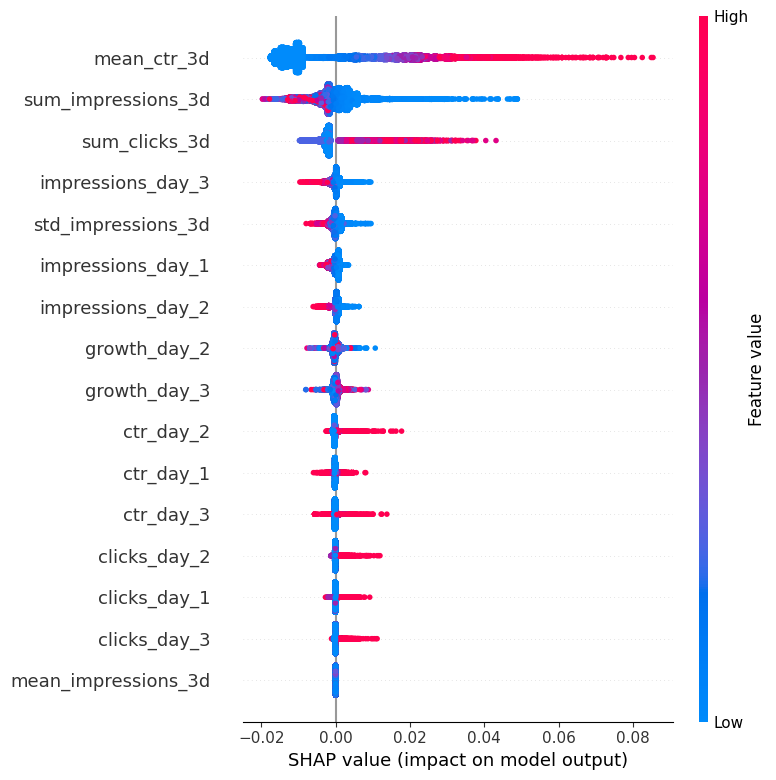

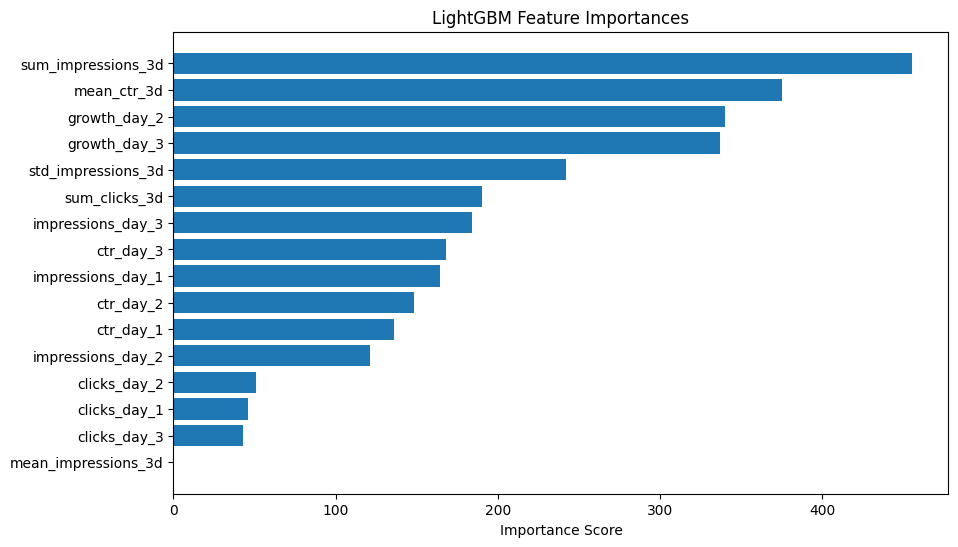

In [ ]:
for target_metric, model in models.items():
  print('Target metric:', target_metric)
  x_train = train_features_df.drop(columns=['image_name', 'product_name'] + target_metric_features)

  shap_values = model_shap_values[target_metric]
  shap.summary_plot(shap_values, x_train, show=True)
  print()

  importances = model.feature_importances_
  feature_names = x_train.columns

  plt.figure(figsize=(10, 6))
  sorted_idx = importances.argsort()[::-1][:20]
  plt.barh(range(len(sorted_idx)), importances[sorted_idx])
  plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
  plt.gca().invert_yaxis()
  plt.title("LightGBM Feature Importances")
  plt.xlabel("Importance Score")
  plt.show()
  print()

### PCA image features

In [ ]:
import pickle
from sklearn.decomposition import PCA

def add_image_features(train_df, test_df, image_model, n_components=32):
  with open(f'train_{image_model}_embeddings.pkl', 'rb') as f:
    train_image_embeddings = pickle.load(f)
  with open(f'test_{image_model}_embeddings.pkl', 'rb') as f:
    test_image_embeddings = pickle.load(f)
  image_embeddings = {**train_image_embeddings, **test_image_embeddings}
  image_embeddings_df = pd.DataFrame.from_dict(image_embeddings, orient='index').reset_index(names='image_name')

  pca = PCA(n_components=n_components)
  reduced_embeddings = pca.fit_transform(image_embeddings_df.drop(columns=['image_name']))
  reduced_df = pd.DataFrame(reduced_embeddings, columns=[f'{image_model}_pca_{i}' for i in range(n_components)])
  reduced_df['image_name'] = image_embeddings_df['image_name'].values

  return train_df.merge(reduced_df, on='image_name', how='left'), test_df.merge(reduced_df, on='image_name', how='left')

#### Resnet

In [ ]:
train_features_resnet_pca_df, test_features_resnet_pca_df = add_image_features(train_features_df, test_features_df, 'resnet', n_components=10)

In [ ]:
resnet_pca_image_models, resnet_pca_image_results = train_and_test_model(train_features_resnet_pca_df, test_features_resnet_pca_df)
for target_metric, mse in resnet_pca_image_results.items():
  print(f'{target_metric.capitalize()} MSE:', mse)
  improvement = (mse - manual_features_results[target_metric]) / manual_features_results[target_metric]
  print(f'Percent reduction from manual features: {improvement*100:.2f}%')
  print()

Target metric: impressions
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5601
[LightGBM] [Info] Number of data points in the train set: 31870, number of used features: 26
[LightGBM] [Info] Start training from score 165.691779
Target metric: clicks
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5601
[LightGBM] [Info] Number of data points in the train set: 31870, number of used features: 26
[LightGBM] [Info] Start training from score 4.839002
Target metric: ctr
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5601
[LightGBM] [Info] Number of data points in the tra

Target metric: impressions


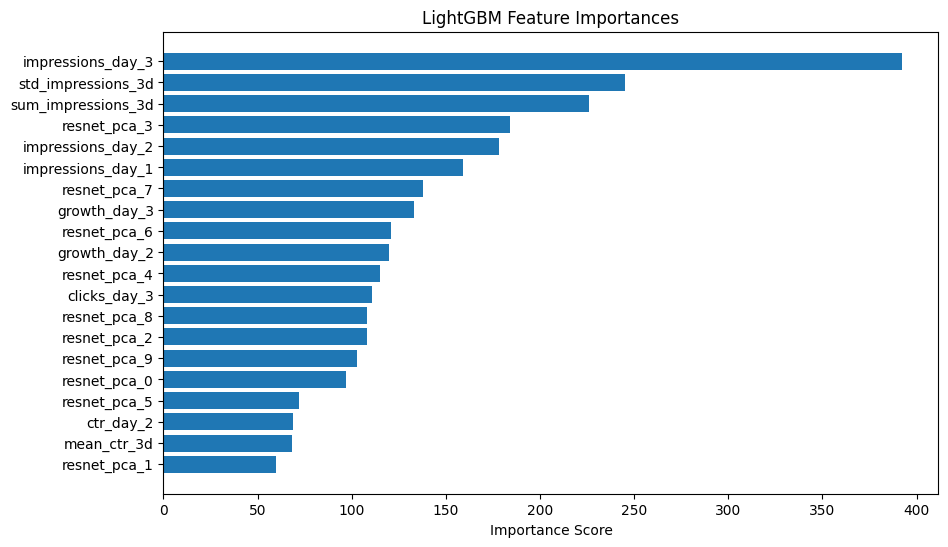


Target metric: clicks


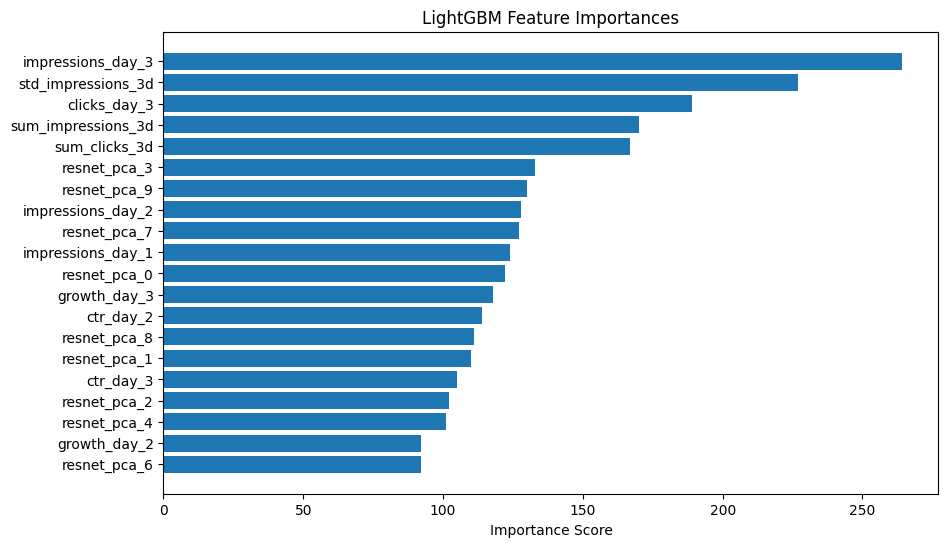


Target metric: ctr


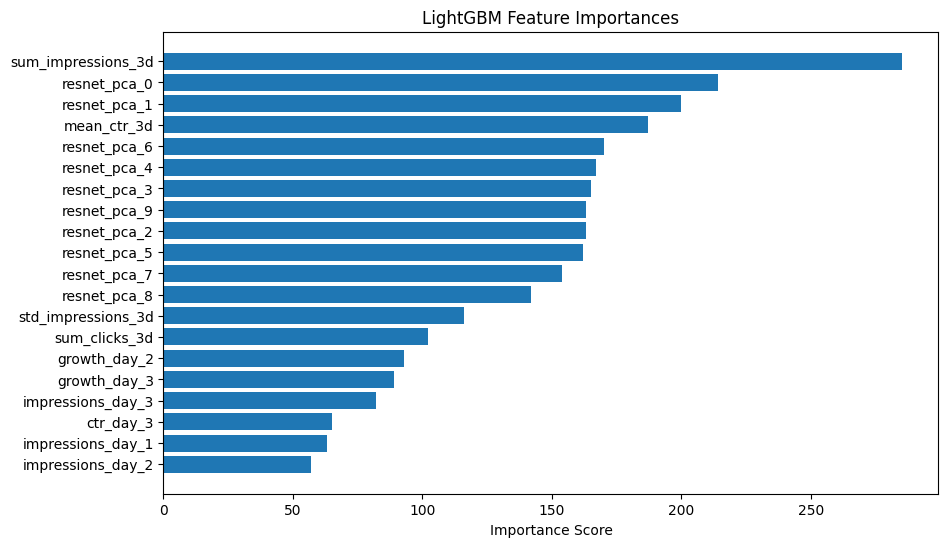

In [ ]:
for target_metric, model in resnet_pca_image_models.items():
  print('Target metric:', target_metric)
  x_train = train_features_resnet_pca_df.drop(columns=['image_name', 'product_name'] + target_metric_features)

  importances = model.feature_importances_
  feature_names = x_train.columns

  plt.figure(figsize=(10, 6))
  sorted_idx = importances.argsort()[::-1][:20]
  plt.barh(range(len(sorted_idx)), importances[sorted_idx])
  plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
  plt.gca().invert_yaxis()
  plt.title("LightGBM Feature Importances")
  plt.xlabel("Importance Score")
  plt.show()
  print()

#### Openclip

In [ ]:
train_features_openclip_pca_df, test_features_openclip_pca_df = add_image_features(train_features_df, test_features_df, 'openclip', n_components=10)

In [ ]:
openclip_pca_image_models, openclip_pca_image_results = train_and_test_model(train_features_openclip_pca_df, test_features_openclip_pca_df)
for target_metric, mse in openclip_pca_image_results.items():
  manual_improvement = (mse - manual_features_results[target_metric]) / manual_features_results[target_metric]
  resnet_improvement = (mse - resnet_pca_image_results[target_metric]) / resnet_pca_image_results[target_metric]
  print(f'{target_metric.capitalize()} MSE:', mse)
  print(f'Percent reduction from manual features: {manual_improvement*100:.2f}%')
  print(f'Percent reduction from manual + resnet PCA features: {resnet_improvement*100:.2f}%')
  print()

Target metric: impressions
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5601
[LightGBM] [Info] Number of data points in the train set: 31870, number of used features: 26
[LightGBM] [Info] Start training from score 165.691779
Target metric: clicks
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5601
[LightGBM] [Info] Number of data points in the train set: 31870, number of used features: 26
[LightGBM] [Info] Start training from score 4.839002
Target metric: ctr
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

Target metric: impressions


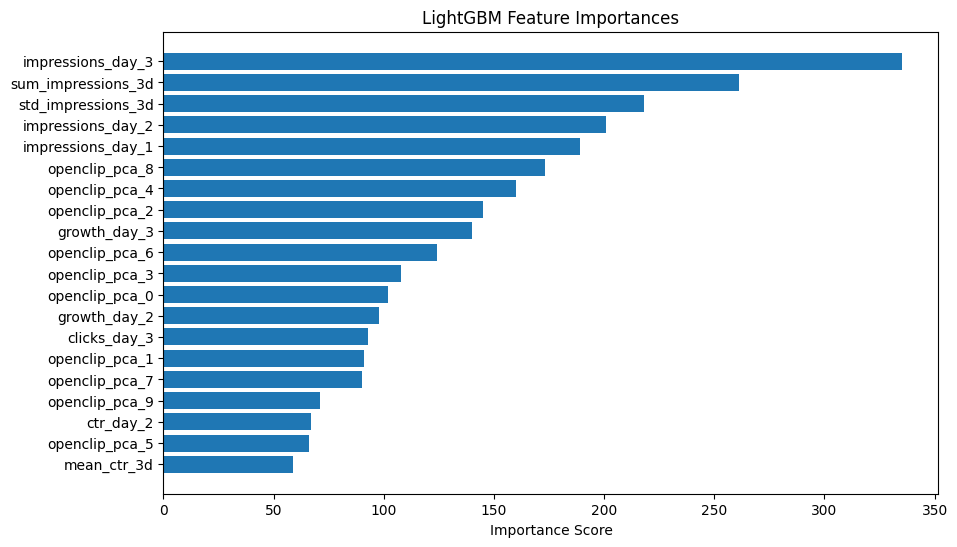


Target metric: clicks


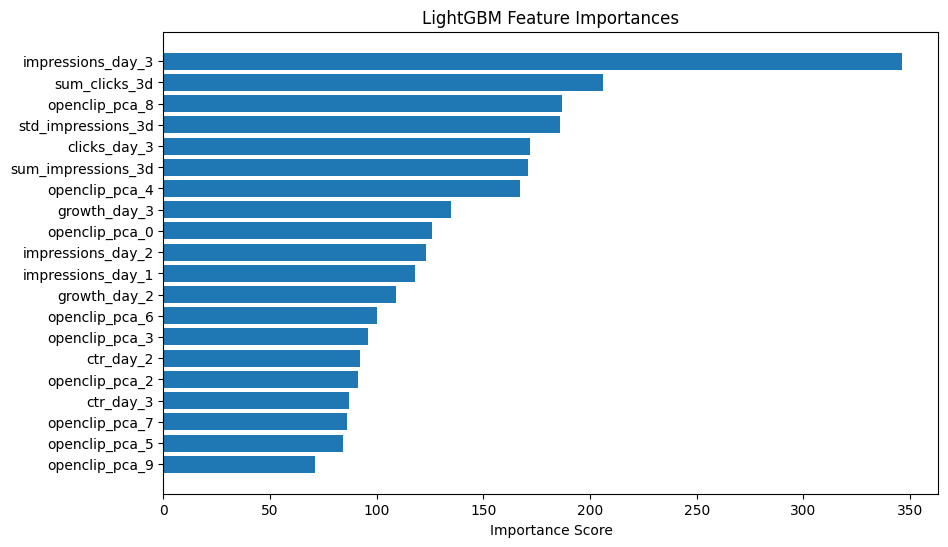


Target metric: ctr


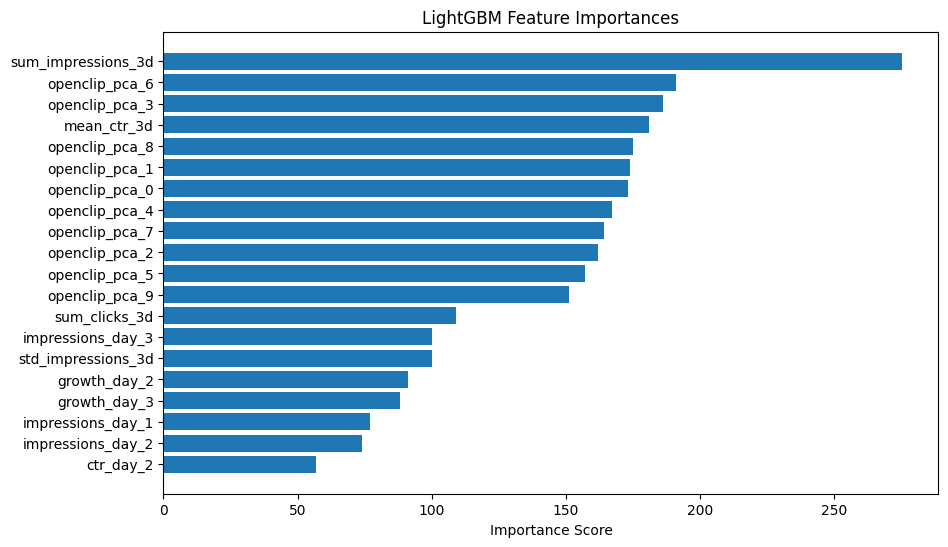

In [ ]:
for target_metric, model in openclip_pca_image_models.items():
  print('Target metric:', target_metric)
  x_train = train_features_openclip_pca_df.drop(columns=['image_name', 'product_name'] + target_metric_features)

  importances = model.feature_importances_
  feature_names = x_train.columns

  plt.figure(figsize=(10, 6))
  sorted_idx = importances.argsort()[::-1][:20]
  plt.barh(range(len(sorted_idx)), importances[sorted_idx])
  plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
  plt.gca().invert_yaxis()
  plt.title("LightGBM Feature Importances")
  plt.xlabel("Importance Score")
  plt.show()
  print()

In [ ]:
train_features_openclip_df, test_features_openclip_df = add_image_features(train_features_df, test_features_df, 'openclip', n_components=10)

### Raw embeddings

In [19]:
import pickle

def add_image_features(train_df, test_df, image_model):
  dims = 2048 if image_model == 'resnet' else 512
  with open(f'train_{image_model}_embeddings.pkl', 'rb') as f:
    train_image_embeddings = pickle.load(f)
  with open(f'test_{image_model}_embeddings.pkl', 'rb') as f:
    test_image_embeddings = pickle.load(f)
  image_embeddings = {**train_image_embeddings, **test_image_embeddings}
  image_embeddings_df = pd.DataFrame.from_dict(image_embeddings, orient='index', columns=[f'{image_model}_embed_{i}' for i in range(dims)]).reset_index(names='image_name')

  return train_df.merge(image_embeddings_df, on='image_name', how='left'), test_df.merge(image_embeddings_df, on='image_name', how='left')

#### Resnet

In [ ]:
train_features_resnet_df, test_features_resnet_df = add_image_features(train_features_df, test_features_df, 'resnet')

,image_name,product_name,sum_impressions_3d,mean_impressions_3d,std_impressions_3d,sum_clicks_3d,mean_ctr_3d,impressions_day_1,impressions_day_2,impressions_day_3,...,resnet_2038,resnet_2039,resnet_2040,resnet_2041,resnet_2042,resnet_2043,resnet_2044,resnet_2045,resnet_2046,resnet_2047
0,00067c5a5ca8566b4ff40b39a939e284.png,9719d616491615abac60fe42257b9061,23,7.666667,4.932883,0,0.000000,2,10,11,...,0.370469,0.398632,0.144654,0.378238,0.990556,0.178570,0.143447,0.372770,0.709670,0.453990
1,000826cdbebf3a6b6d67f6bc71b07d4b.png,31f1ad0b82a63c29710f5e6443ecd85a,13,4.333333,0.577350,0,0.000000,5,4,4,...,0.913614,0.984908,0.545709,0.614844,0.530295,0.032100,0.204714,0.149853,0.213192,0.983337
2,000b7d8cfb7f79974204c3cf725bd693.png,05db51305a012480370cb4e202ef35fa,141,47.000000,36.373067,9,0.039138,14,41,86,...,0.867176,0.385359,0.759037,0.410945,0.240173,0.432101,0.957840,0.700274,0.339096,0.361258
3,00115d7f555cde2ad68f31652386a8df.png,16fbf4369d52a780d25afad26334e12f,16,5.333333,0.577350,2,0.133333,5,6,5,...,0.185376,0.127831,0.686199,0.713117,0.338967,0.275255,0.144529,0.031788,0.225054,0.589408
4,001480f6d1c81460e08678120085572e.png,77304d6c8b37e1db13f10f66aab41d71,61,20.333333,5.507571,3,0.055556,15,26,20,...,0.435477,0.796913,0.322028,0.447598,0.681186,0.746849,0.312195,0.299995,0.073966,1.509819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31865,fff55f3d84a8eecdd1cc6c974be807cc.png,b0e09f3e0d18cc6e6147b756f50f17f7,79,26.333333,2.081666,1,0.012346,28,27,24,...,0.639869,0.031898,0.586430,0.151012,0.195820,0.381661,0.362702,0.220717,1.072270,1.526229
31866,fff5ec19978ec09bdc370c3b212e29ef.png,142fff05a1fc390bd5bb3eb0a20e4b1f,31,10.333333,1.527525,0,0.000000,12,10,9,...,0.254850,0.434471,1.011260,0.250840,0.516314,0.225138,0.052583,0.605578,0.312117,0.113999
31867,fff8b6658aec2f7cdbac49b9cffa5c78.png,f754c911fd0401c9be3993234d509fbc,5,1.666667,1.154701,0,0.000000,1,1,3,...,0.038682,0.359253,0.514111,0.367456,0.759198,0.184010,0.166612,0.087016,0.738956,0.254603
31868,fffa5e1c32f5bf031d392c56da6c6ca8.png,9abca203fcd13f819f7170004116c42a,14,4.666667,3.785939,1,0.111111,2,9,3,...,0.497071,0.134730,0.782681,0.120062,0.156152,0.220362,0.165896,0.162695,0.293286,0.459487


In [ ]:
resnet_image_models, resnet_image_results = train_and_test_model(train_features_resnet_df, test_features_resnet_df)
for target_metric, mse in resnet_image_results.items():
  print(f'{target_metric.capitalize()} MSE:', mse)
  improvement = (mse - manual_features_results[target_metric]) / manual_features_results[target_metric]
  print(f'Percent reduction from manual features: {improvement*100:.2f}%')
  print()

Target metric: impressions
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 3.506986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 525291
[LightGBM] [Info] Number of data points in the train set: 31870, number of used features: 2064
[LightGBM] [Info] Start training from score 165.691779
Target metric: clicks
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 3.850181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 525291
[LightGBM] [Info] Number of data points in the train set: 31870, number of used features: 2064
[LightGBM] [Info] Start training from score 4.839002
Target metric: ctr
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.809128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 525291
[LightGBM] [Info] Number of data points 

Target metric: impressions


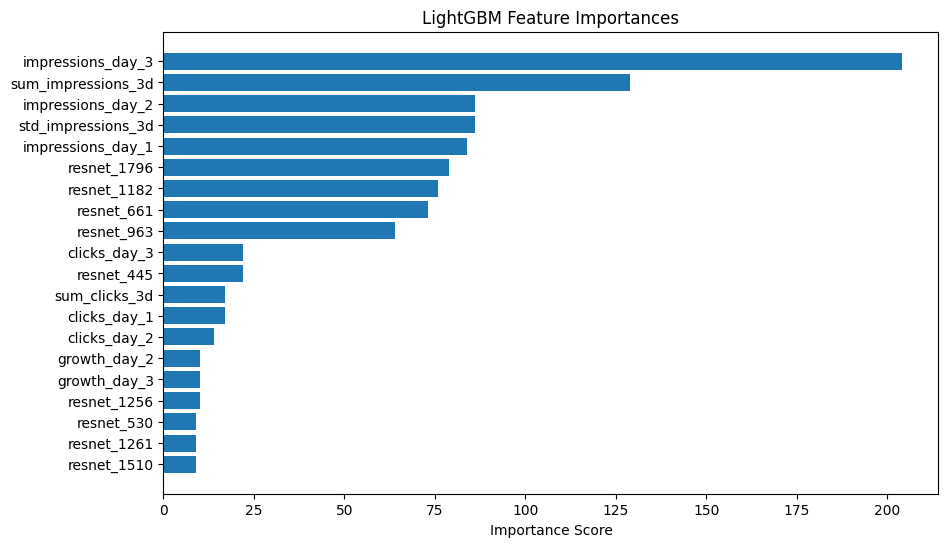


Target metric: clicks


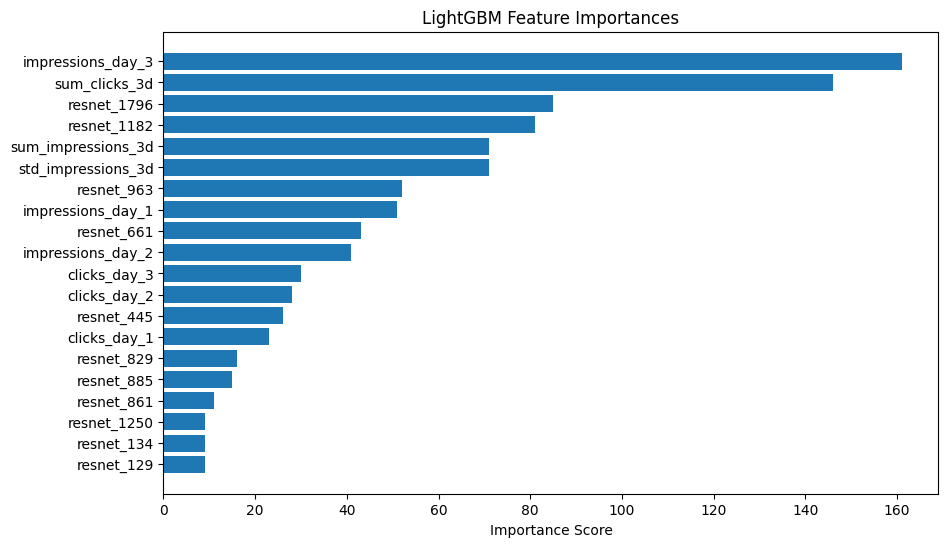


Target metric: ctr


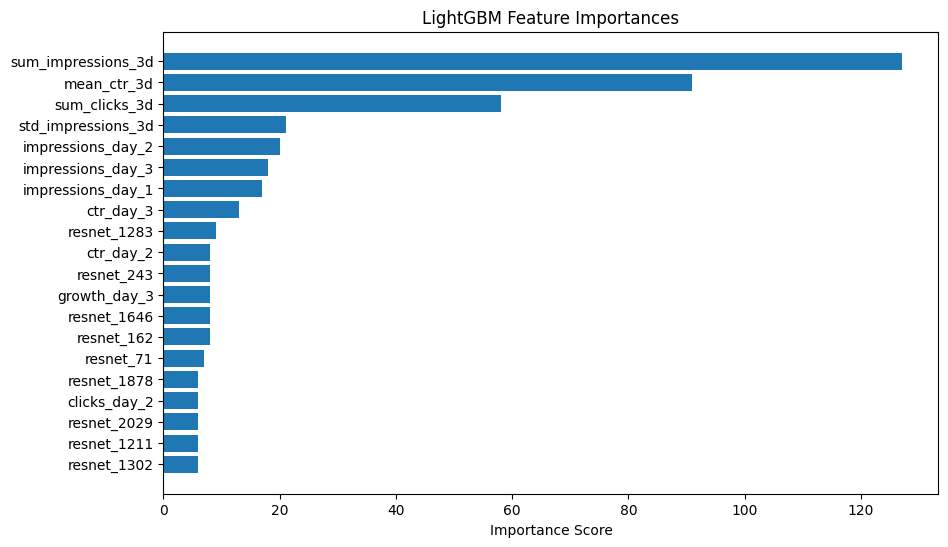

In [ ]:
for target_metric, model in resnet_image_models.items():
  print('Target metric:', target_metric)
  x_train = train_features_resnet_df.drop(columns=['image_name', 'product_name'] + target_metric_features)

  importances = model.feature_importances_
  feature_names = x_train.columns

  plt.figure(figsize=(10, 6))
  sorted_idx = importances.argsort()[::-1][:20]
  plt.barh(range(len(sorted_idx)), importances[sorted_idx])
  plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
  plt.gca().invert_yaxis()
  plt.title("LightGBM Feature Importances")
  plt.xlabel("Importance Score")
  plt.show()
  print()

#### Openclip

In [ ]:
train_features_openclip_df, test_features_openclip_df = add_image_features(train_features_df, test_features_df, 'openclip')

In [ ]:
openclip_image_models, openclip_image_results = train_and_test_model(train_features_openclip_df, test_features_openclip_df)
for target_metric, mse in openclip_image_results.items():
  manual_improvement = (mse - manual_features_results[target_metric]) / manual_features_results[target_metric]
  resnet_improvement = (mse - resnet_image_results[target_metric]) / resnet_image_results[target_metric]
  print(f'{target_metric.capitalize()} MSE:', mse)
  print(f'Percent reduction from manual features: {manual_improvement*100:.2f}%')
  print(f'Percent reduction from manual + resnet features: {resnet_improvement*100:.2f}%')
  print()

Target metric: impressions
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.302092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 133611
[LightGBM] [Info] Number of data points in the train set: 31870, number of used features: 528
[LightGBM] [Info] Start training from score 165.691779
Target metric: clicks
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.354313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 133611
[LightGBM] [Info] Number of data points in the train set: 31870, number of used features: 528
[LightGBM] [Info] Start training from score 4.839002
Target metric: ctr
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.717416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 133611
[LightGBM] [Info] Number of data points in

Target metric: impressions


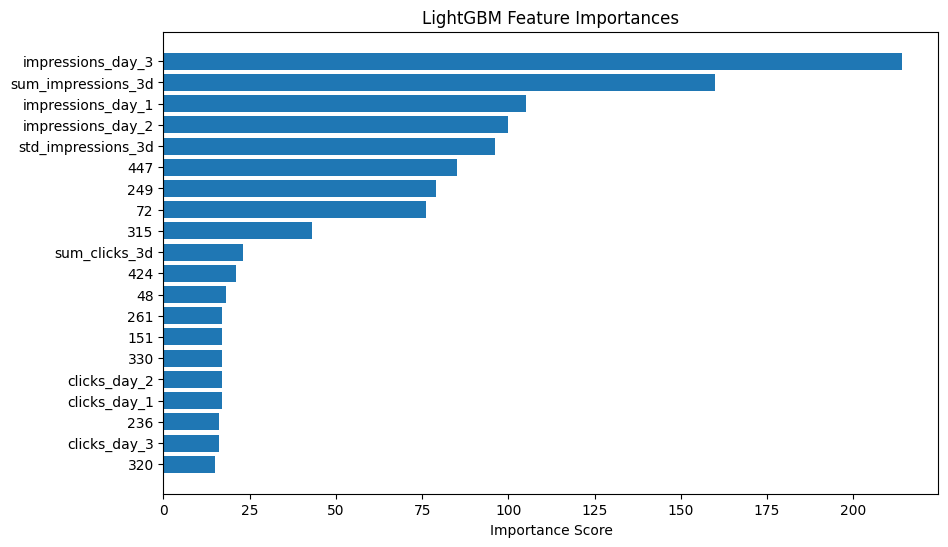


Target metric: clicks


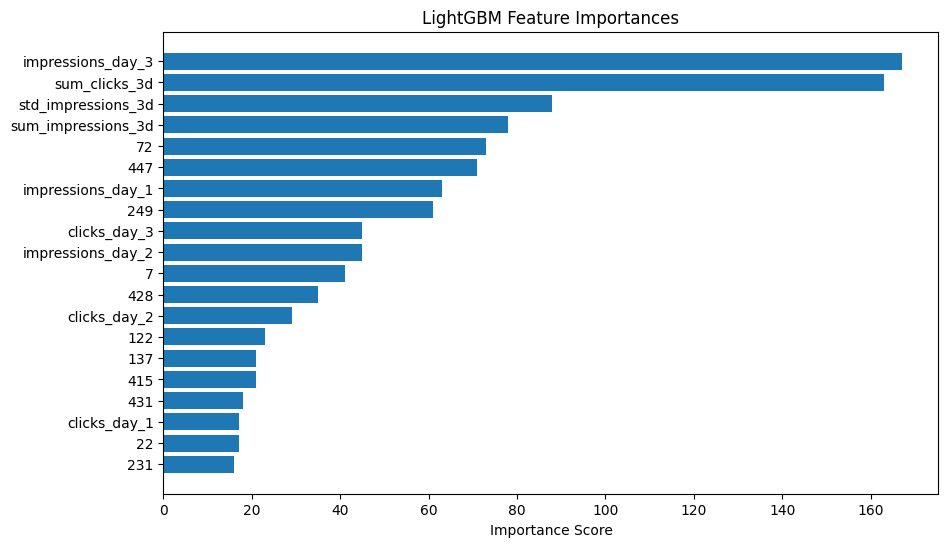


Target metric: ctr


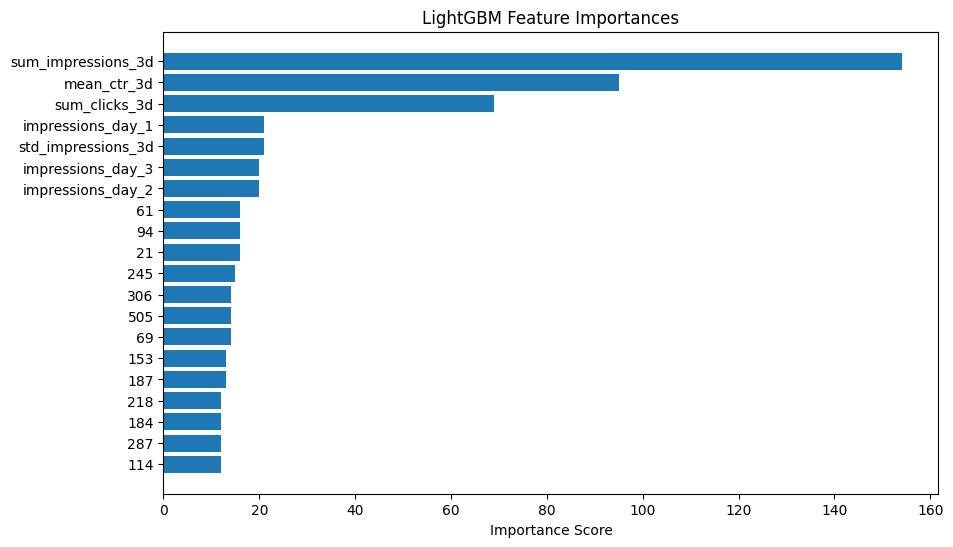

In [ ]:
for target_metric, model in openclip_image_models.items():
  print('Target metric:', target_metric)
  x_train = train_features_openclip_df.drop(columns=['image_name', 'product_name'] + target_metric_features)

  importances = model.feature_importances_
  feature_names = x_train.columns

  plt.figure(figsize=(10, 6))
  sorted_idx = importances.argsort()[::-1][:20]
  plt.barh(range(len(sorted_idx)), importances[sorted_idx])
  plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
  plt.gca().invert_yaxis()
  plt.title("LightGBM Feature Importances")
  plt.xlabel("Importance Score")
  plt.show()
  print()

### Embedding summaries

In [ ]:
def add_embedding_summaries(train_df, test_df, image_model):
  with open(f'train_{image_model}_embeddings.pkl', 'rb') as f:
    train_image_embeddings = pickle.load(f)
  with open(f'test_{image_model}_embeddings.pkl', 'rb') as f:
    test_image_embeddings = pickle.load(f)
  image_embeddings = {**train_image_embeddings, **test_image_embeddings}
  image_embeddings_df = pd.DataFrame.from_dict(image_embeddings, orient='index').reset_index(names='image_name')

  values = image_embeddings_df.drop(columns=['image_name']).values
  summary_df = pd.DataFrame({
      f'{image_model}_embed_mean': values.mean(axis=1),
      f'{image_model}_embed_std': values.std(axis=1),
      f'{image_model}_embed_max': values.max(axis=1),
      f'{image_model}_embed_min': values.min(axis=1),
  })
  summary_df['image_name'] = image_embeddings_df['image_name'].values

  return train_df.merge(summary_df, on='image_name', how='left'), test_df.merge(summary_df, on='image_name', how='left')

#### Resnet

In [ ]:
train_features_resnet_summaries_df, test_features_resnet_summaries_df = add_embedding_summaries(train_features_df, test_features_df, 'resnet')

In [ ]:
resnet_summaries_models, resnet_summaries_results = train_and_test_model(train_features_resnet_summaries_df, test_features_resnet_summaries_df)
for target_metric, mse in resnet_summaries_results.items():
  print(f'{target_metric.capitalize()} MSE:', mse)
  improvement = (mse - manual_features_results[target_metric]) / manual_features_results[target_metric]
  print(f'Percent reduction from manual features: {improvement*100:.2f}%')
  print()

Target metric: impressions
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4071
[LightGBM] [Info] Number of data points in the train set: 31870, number of used features: 20
[LightGBM] [Info] Start training from score 165.691779
Target metric: clicks
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4071
[LightGBM] [Info] Number of data points in the train set: 31870, number of used features: 20
[LightGBM] [Info] Start training from score 4.839002
Target metric: ctr
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

Target metric: impressions


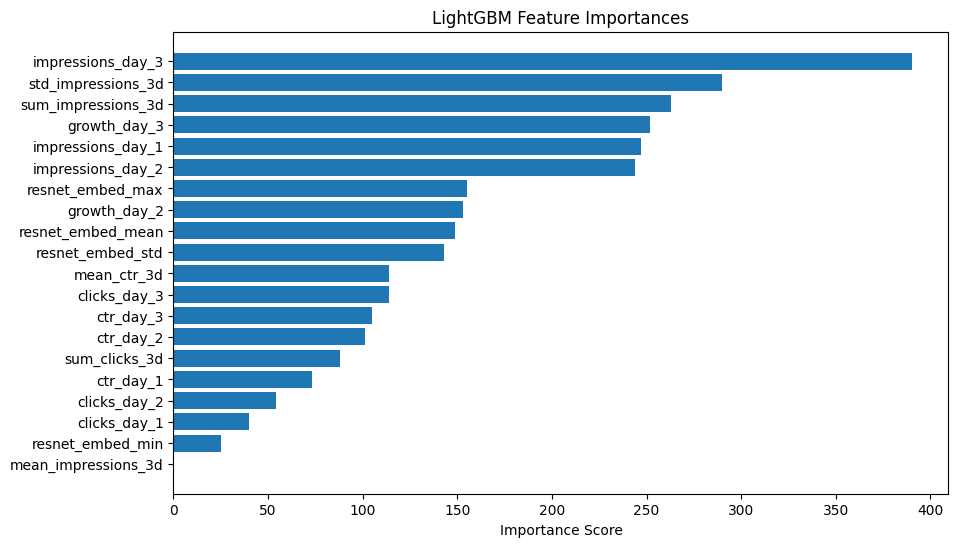


Target metric: clicks


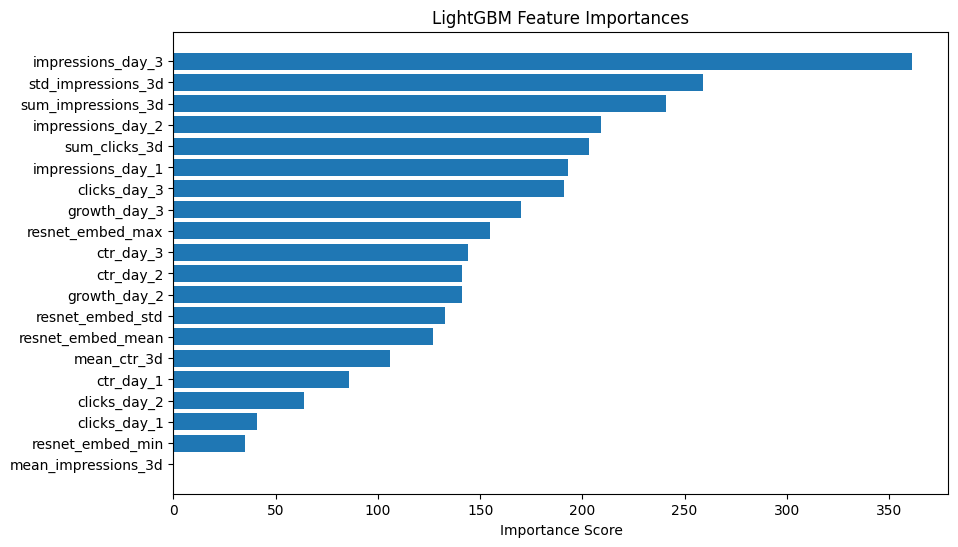


Target metric: ctr


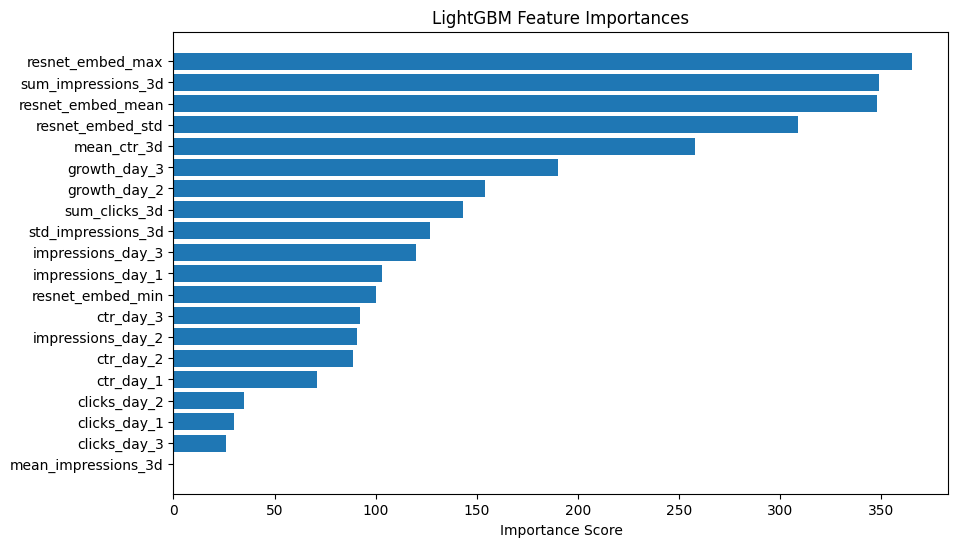

In [ ]:
for target_metric, model in resnet_summaries_models.items():
  print('Target metric:', target_metric)
  x_train = train_features_resnet_summaries_df.drop(columns=['image_name', 'product_name'] + target_metric_features)

  importances = model.feature_importances_
  feature_names = x_train.columns

  plt.figure(figsize=(10, 6))
  sorted_idx = importances.argsort()[::-1][:20]
  plt.barh(range(len(sorted_idx)), importances[sorted_idx])
  plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
  plt.gca().invert_yaxis()
  plt.title("LightGBM Feature Importances")
  plt.xlabel("Importance Score")
  plt.show()
  print()

#### OpenCLIP

In [ ]:
train_features_openclip_summaries_df, test_features_openclip_summaries_df = add_embedding_summaries(train_features_df, test_features_df, 'openclip')

In [ ]:
openclip_summaries_models, openclip_summaries_results = train_and_test_model(train_features_openclip_summaries_df, test_features_openclip_summaries_df)
for target_metric, mse in openclip_summaries_results.items():
  manual_improvement = (mse - manual_features_results[target_metric]) / manual_features_results[target_metric]
  resnet_improvement = (mse - resnet_summaries_results[target_metric]) / resnet_summaries_results[target_metric]
  print(f'{target_metric.capitalize()} MSE:', mse)
  print(f'Percent reduction from manual features: {manual_improvement*100:.2f}%')
  print(f'Percent reduction from manual + resnet features: {resnet_improvement*100:.2f}%')
  print()

Target metric: impressions
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4071
[LightGBM] [Info] Number of data points in the train set: 31870, number of used features: 20
[LightGBM] [Info] Start training from score 165.691779
Target metric: clicks
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4071
[LightGBM] [Info] Number of data points in the train set: 31870, number of used features: 20
[LightGBM] [Info] Start training from score 4.839002
Target metric: ctr
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017550 seconds.
You can set `f

Target metric: impressions


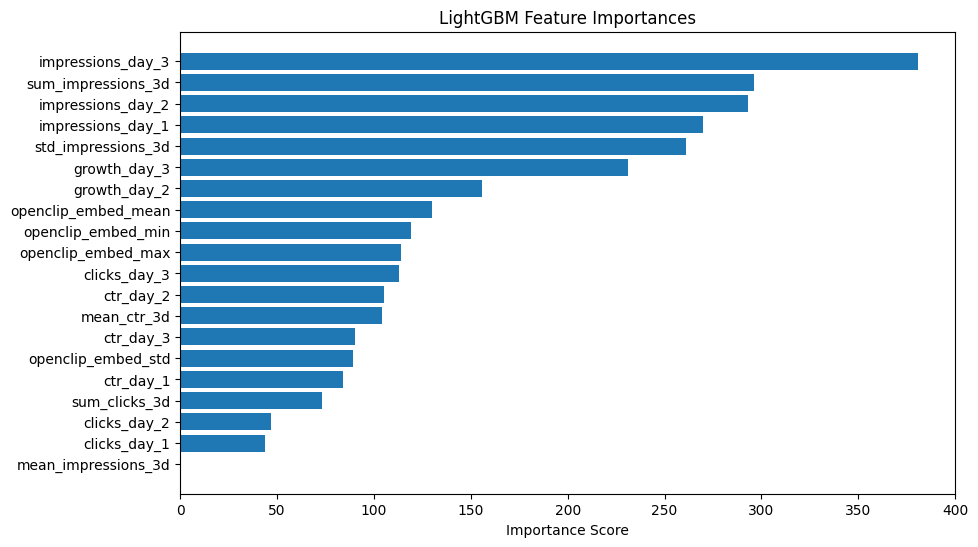


Target metric: clicks


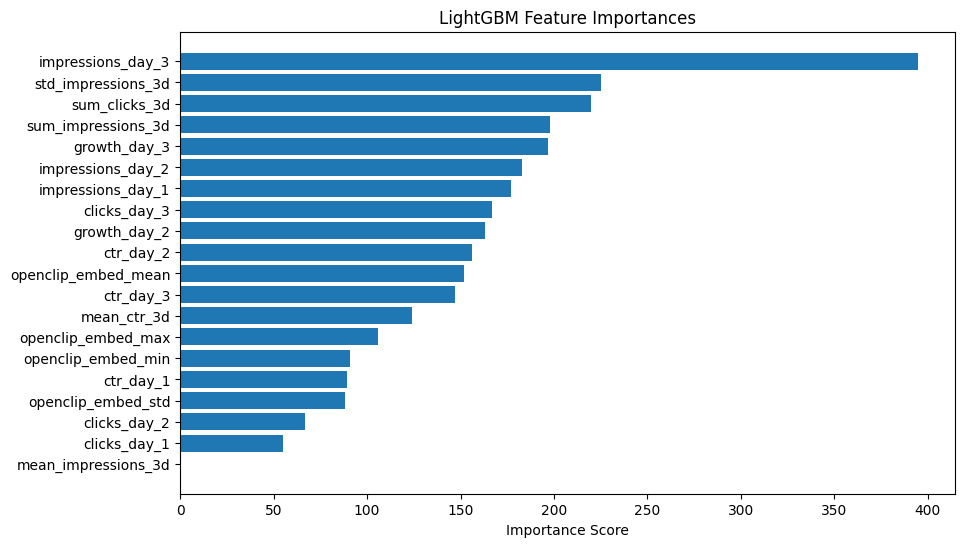


Target metric: ctr


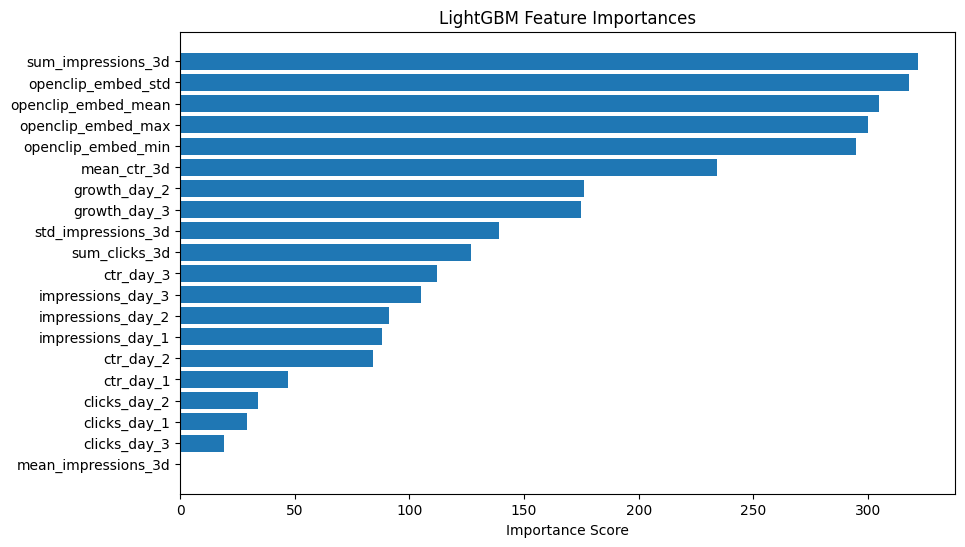

In [ ]:
for target_metric, model in openclip_summaries_models.items():
  print('Target metric:', target_metric)
  x_train = train_features_openclip_summaries_df.drop(columns=['image_name', 'product_name'] + target_metric_features)

  importances = model.feature_importances_
  feature_names = x_train.columns

  plt.figure(figsize=(10, 6))
  sorted_idx = importances.argsort()[::-1][:20]
  plt.barh(range(len(sorted_idx)), importances[sorted_idx])
  plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
  plt.gca().invert_yaxis()
  plt.title("LightGBM Feature Importances")
  plt.xlabel("Importance Score")
  plt.show()
  print()

### L1 feature selection (WIP)

In [ ]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

def add_select_embedding_features(train_features_df, test_features_df, image_model, target_name, top_k=None):
  dims = 2048 if image_model == 'resnet' else 512
  with open(f'train_{image_model}_embeddings.pkl', 'rb') as f:
    train_embeddings = pickle.load(f)
  embeddings_df = pd.DataFrame.from_dict(train_embeddings, orient='index', columns=[f'{image_model}_{i}' for i in range(dims)]).reset_index(names='image_name')

  # Merge embeddings into your features using image_name
  merged = train_features_df[['image_name']].merge(embeddings_df, on='image_name', how='left')

  # Drop image_name and standardize embeddings
  embed_only = merged.drop(columns=['image_name'])
  scaler = StandardScaler()
  embed_scaled = scaler.fit_transform(embed_only)

  # Target (e.g., CTR or total_impressions)
  y = train_features_df[target_name].values

  # Fit LassoCV for automatic alpha selection
  lasso = LassoCV(cv=5, max_iter=10000, random_state=42).fit(embed_scaled, y)

  # Select non-zero coefficients
  if top_k:
    nonzero = np.where(lasso.coef_ != 0)[0]
    top_indices = np.argsort(np.abs(lasso.coef_[nonzero]))[::-1][:top_k]
    selected_features = embed_only.columns[nonzero[top_indices]]
  else:
    selected_mask = lasso.coef_ != 0
    selected_features = embed_only.columns[selected_mask]
  print(f"Selected {len(selected_features)} embedding features using L1.")
  print(selected_features)

  # Return DataFrame with selected features and image_name
  selected_train_embed_df = merged[['image_name']].copy()
  selected_train_embed_df[selected_features] = embed_only[selected_features]

  with open(f'test_{image_model}_embeddings.pkl', 'rb') as f:
    test_embeddings = pickle.load(f)
  embeddings_df = pd.DataFrame.from_dict(test_embeddings, orient='index', columns=[f'{image_model}_{i}' for i in range(dims)]).reset_index(names='image_name')
  merged = test_features_df[['image_name']].merge(embeddings_df, on='image_name', how='left')
  selected_test_embed_df = merged[['image_name']].copy()
  selected_test_embed_df[selected_features] = merged[selected_features]

  return train_features_df.merge(selected_train_embed_df, on='image_name', how='left'), test_features_df.merge(selected_test_embed_df, on='image_name', how='left')

#### Resnet

In [ ]:
train_features_resnet_selected_df, test_features_resnet_selected_df = add_select_embedding_features(train_features_df, test_features_df, 'resnet', target_name='total_ctr', top_k=50)

Selected 50 embedding features using L1.
Index(['resnet_137', 'resnet_1857', 'resnet_702', 'resnet_1393', 'resnet_1776',
       'resnet_478', 'resnet_1343', 'resnet_1474', 'resnet_549', 'resnet_788',
       'resnet_1563', 'resnet_1359', 'resnet_869', 'resnet_789', 'resnet_112',
       'resnet_1256', 'resnet_834', 'resnet_520', 'resnet_139', 'resnet_151',
       'resnet_608', 'resnet_563', 'resnet_2040', 'resnet_92', 'resnet_1732',
       'resnet_926', 'resnet_863', 'resnet_1808', 'resnet_1302', 'resnet_1611',
       'resnet_1267', 'resnet_71', 'resnet_1031', 'resnet_485', 'resnet_1959',
       'resnet_1370', 'resnet_1062', 'resnet_1115', 'resnet_1537',
       'resnet_589', 'resnet_860', 'resnet_553', 'resnet_42', 'resnet_666',
       'resnet_297', 'resnet_2008', 'resnet_1575', 'resnet_1619',
       'resnet_1544', 'resnet_2005'],
      dtype='object')


In [ ]:
train_features_resnet_selected_df

,image_name,product_name,sum_impressions_3d,mean_impressions_3d,std_impressions_3d,sum_clicks_3d,mean_ctr_3d,impressions_day_1,impressions_day_2,impressions_day_3,...,resnet_860,resnet_553,resnet_42,resnet_666,resnet_297,resnet_2008,resnet_1575,resnet_1619,resnet_1544,resnet_2005
0,00067c5a5ca8566b4ff40b39a939e284.png,9719d616491615abac60fe42257b9061,23,7.666667,4.932883,0,0.000000,2,10,11,...,0.565563,0.169818,0.131048,0.254218,0.330817,0.130011,0.544879,0.088006,1.910504,0.209110
1,000826cdbebf3a6b6d67f6bc71b07d4b.png,31f1ad0b82a63c29710f5e6443ecd85a,13,4.333333,0.577350,0,0.000000,5,4,4,...,0.076599,0.774426,0.444850,0.165758,0.086377,0.096262,0.152628,1.028329,1.114722,0.541880
2,000b7d8cfb7f79974204c3cf725bd693.png,05db51305a012480370cb4e202ef35fa,141,47.000000,36.373067,9,0.039138,14,41,86,...,0.067859,0.325186,0.137015,1.461858,0.059466,0.218025,0.793477,0.151433,0.124679,0.702291
3,00115d7f555cde2ad68f31652386a8df.png,16fbf4369d52a780d25afad26334e12f,16,5.333333,0.577350,2,0.133333,5,6,5,...,0.113094,0.400395,0.394367,0.400136,0.007348,0.652323,0.237182,0.177091,0.720502,1.465524
4,001480f6d1c81460e08678120085572e.png,77304d6c8b37e1db13f10f66aab41d71,61,20.333333,5.507571,3,0.055556,15,26,20,...,0.398366,0.152952,0.044845,1.279960,0.680785,0.544736,0.187213,0.202374,0.884168,0.935436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31865,fff55f3d84a8eecdd1cc6c974be807cc.png,b0e09f3e0d18cc6e6147b756f50f17f7,79,26.333333,2.081666,1,0.012346,28,27,24,...,0.606967,0.589502,0.559813,0.799910,0.108542,0.283210,0.725920,1.202497,0.428648,0.211212
31866,fff5ec19978ec09bdc370c3b212e29ef.png,142fff05a1fc390bd5bb3eb0a20e4b1f,31,10.333333,1.527525,0,0.000000,12,10,9,...,0.755516,0.395462,0.291051,0.203166,0.329122,0.460834,0.799686,1.012116,1.298908,1.778106
31867,fff8b6658aec2f7cdbac49b9cffa5c78.png,f754c911fd0401c9be3993234d509fbc,5,1.666667,1.154701,0,0.000000,1,1,3,...,0.842457,0.618500,0.784833,0.370337,0.054469,0.181209,0.371704,0.507878,0.929033,1.023531
31868,fffa5e1c32f5bf031d392c56da6c6ca8.png,9abca203fcd13f819f7170004116c42a,14,4.666667,3.785939,1,0.111111,2,9,3,...,0.086247,0.262452,0.329308,0.771297,0.214937,0.992057,0.592242,0.051359,0.277825,0.043793


In [ ]:
test_features_resnet_selected_df

,image_name,product_name,sum_impressions_3d,mean_impressions_3d,std_impressions_3d,sum_clicks_3d,mean_ctr_3d,impressions_day_1,impressions_day_2,impressions_day_3,...,resnet_860,resnet_553,resnet_42,resnet_666,resnet_297,resnet_2008,resnet_1575,resnet_1619,resnet_1544,resnet_2005
0,000503074d88d1b22d5a1ef485734a2e.png,08a9ea1ef62a9c7432db90a1b4f490c6,4,1.333333,0.577350,0,0.000000,1,2,1,...,0.141817,0.622117,0.340325,1.511444,0.121135,0.541784,0.835655,0.136338,1.034436,0.426346
1,0010c1f311a2f1c925fe6bea5123b4f3.png,6a2dc31908e5ff11fb0ad36218a6062d,46,15.333333,7.505553,1,0.041667,15,23,8,...,0.688320,0.373645,0.367806,0.017000,0.098706,0.013053,0.012198,0.629054,0.348184,0.340583
2,001c642869e8de744b2acae7fcc387dd.png,f514dc57e09692ceb1bb7c689f26f0bd,15,5.000000,4.582576,0,0.000000,1,4,10,...,0.927617,0.305666,0.881701,0.499013,0.100707,0.197985,0.324397,0.270197,1.570910,0.734418
3,002df283e38a0656948a74b9fe39f819.png,ca893704a777812cae535722013a19d4,43,14.333333,1.527525,5,0.117903,13,14,16,...,0.812535,1.202074,0.704410,0.597023,0.414441,0.120603,0.306405,0.561024,0.224925,0.396218
4,002e2e7b8835c724c3f4316c0100cb14.png,1a668347051c3e0fa06d2020c061314a,16,5.333333,1.527525,0,0.000000,4,5,7,...,0.559121,0.174241,0.363205,1.008486,0.286311,0.056683,0.453537,0.131341,0.575001,0.523362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7873,ffedfaa9933e3af0a6e6ca3dcbeabaa2.png,8b8d3e8bca011f6a69a483e1cabe8d38,12,4.000000,1.000000,1,0.066667,3,4,5,...,0.421955,0.065956,0.256123,0.102188,0.067128,0.045449,0.219259,0.209154,0.790629,0.290869
7874,fff55f3d84a8eecdd1cc6c974be807cc.png,b0e09f3e0d18cc6e6147b756f50f17f7,79,26.333333,2.081666,1,0.012346,28,27,24,...,0.606967,0.589502,0.559813,0.799910,0.108542,0.283210,0.725920,1.202497,0.428648,0.211212
7875,fff6c01f0a8972f85e70df8aa32a5c3f.png,690137a9af11e45ec65588e65e0d23bf,12,4.000000,1.000000,0,0.000000,3,4,5,...,0.612556,0.119064,0.100754,0.507061,0.140829,0.185837,0.263945,0.328522,1.225929,0.847740
7876,fff9fbe170dee413ddd59fe81b0b9088.png,8b5db4c71f1d1eb7df403b6cd9c0b017,5,1.666667,0.577350,0,0.000000,2,1,2,...,0.253647,0.456093,0.084676,0.545227,0.058960,0.339742,0.998949,0.215623,0.838422,0.180000


In [ ]:
resnet_selected_models, resnet_selected_results = train_and_test_model(train_features_resnet_summaries_df, test_features_resnet_summaries_df)
for target_metric, mse in resnet_selected_results.items():
  print(f'{target_metric.capitalize()} MSE:', mse)
  improvement = (mse - manual_features_results[target_metric]) / manual_features_results[target_metric]
  print(f'Percent reduction from manual features: {improvement*100:.2f}%')
  print()

In [ ]:
for target_metric, model in resnet_selected_models.items():
  print('Target metric:', target_metric)
  x_train = train_features_resnet_selected_df.drop(columns=['image_name', 'product_name'] + target_metric_features)

  importances = model.feature_importances_
  feature_names = x_train.columns

  plt.figure(figsize=(10, 6))
  sorted_idx = importances.argsort()[::-1][:20]
  plt.barh(range(len(sorted_idx)), importances[sorted_idx])
  plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
  plt.gca().invert_yaxis()
  plt.title("LightGBM Feature Importances")
  plt.xlabel("Importance Score")
  plt.show()
  print()

#### OpenCLIP

In [ ]:
train_features_openclip_selected_df, test_features_openclip_selected_df = add_select_embedding_features(train_features_df, test_features_df, 'openclip', target_name='total_ctr', top_k=50)

In [ ]:
openclip_selected_models, openclip_selected_results = train_and_test_model(train_features_openclip_selected_df, test_features_openclip_selected_df)
for target_metric, mse in openclip_selected_results.items():
  print(f'{target_metric.capitalize()} MSE:', mse)
  improvement = (mse - manual_features_results[target_metric]) / manual_features_results[target_metric]
  print(f'Percent reduction from manual features: {improvement*100:.2f}%')
  print()

In [ ]:
for target_metric, model in openclip_selected_models.items():
  print('Target metric:', target_metric)
  x_train = train_features_openclip_selected_df.drop(columns=['image_name', 'product_name'] + target_metric_features)

  importances = model.feature_importances_
  feature_names = x_train.columns

  plt.figure(figsize=(10, 6))
  sorted_idx = importances.argsort()[::-1][:20]
  plt.barh(range(len(sorted_idx)), importances[sorted_idx])
  plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
  plt.gca().invert_yaxis()
  plt.title("LightGBM Feature Importances")
  plt.xlabel("Importance Score")
  plt.show()
  print()

### Two-tower models

#### Data setup

In [24]:
from sklearn.preprocessing import StandardScaler
import torch

In [15]:
list(train_features_df)

['image_name',
 'product_name',
 'sum_impressions_3d',
 'mean_impressions_3d',
 'std_impressions_3d',
 'sum_clicks_3d',
 'mean_ctr_3d',
 'impressions_day_1',
 'impressions_day_2',
 'impressions_day_3',
 'clicks_day_1',
 'clicks_day_2',
 'clicks_day_3',
 'ctr_day_1',
 'ctr_day_2',
 'ctr_day_3',
 'growth_day_2',
 'growth_day_3',
 'total_impressions',
 'total_clicks',
 'total_ctr']

In [30]:
train_features_resnet_df, test_features_resnet_df = add_image_features(train_features_df, test_features_df, 'resnet')
train_features_openclip_df, test_features_openclip_df = add_image_features(train_features_df, test_features_df, 'openclip')

In [29]:
def convert_df_to_tensors(train_df, test_df):
  # Hand-crafted features
  manual_cols = [col for col in train_df.columns if col.startswith((
      'sum_', 'mean_', 'std_', 'clicks_day_', 'impressions_day_', 'ctr_day_', 'clicks_day_', 'growth_day_'
  ))]
  print(manual_cols)

  # Image embedding features
  img_embed_cols = [col for col in train_df.columns if 'embed' in col]
  print(img_embed_cols)

  # Targets
  target_cols = [col for col in train_df.columns if col.startswith('total')]
  print(target_cols)

  # Extract arrays
  x_manual_train = train_df[manual_cols].values
  x_img_embed_train = train_df[img_embed_cols].values
  y_train = train_df[target_cols].values

  x_manual_test = test_df[manual_cols].values
  x_img_embed_test = test_df[img_embed_cols].values
  y_test = test_df[target_cols].values

  # Scale features
  scaler_manual = StandardScaler().fit(x_manual_train)
  scaler_img_embed = StandardScaler().fit(x_img_embed_train)

  x_manual_train = scaler_manual.transform(x_manual_train)
  x_manual_test = scaler_manual.transform(x_manual_test)
  x_img_embed_train = scaler_img_embed.transform(x_img_embed_train)
  x_img_embed_test = scaler_img_embed.transform(x_img_embed_test)

  # Convert to PyTorch tensors
  x_manual_train = torch.tensor(x_manual_train, dtype=torch.float32)
  x_manual_test = torch.tensor(x_manual_test, dtype=torch.float32)
  x_img_embed_train = torch.tensor(x_img_embed_train, dtype=torch.float32)
  x_img_embed_test = torch.tensor(x_img_embed_test, dtype=torch.float32)
  y_train = torch.tensor(y_train, dtype=torch.float32)
  y_test = torch.tensor(y_test, dtype=torch.float32)

  return (x_manual_train, x_img_embed_train, y_train), (x_manual_test, x_img_embed_test, y_test)

In [36]:
resnet_train, resnet_test = convert_df_to_tensors(train_features_resnet_df, test_features_resnet_df)
openclip_train, openclip_test = convert_df_to_tensors(train_features_openclip_df, test_features_openclip_df)

['sum_impressions_3d', 'mean_impressions_3d', 'std_impressions_3d', 'sum_clicks_3d', 'mean_ctr_3d', 'impressions_day_1', 'impressions_day_2', 'impressions_day_3', 'clicks_day_1', 'clicks_day_2', 'clicks_day_3', 'ctr_day_1', 'ctr_day_2', 'ctr_day_3', 'growth_day_2', 'growth_day_3']
['resnet_embed_0', 'resnet_embed_1', 'resnet_embed_2', 'resnet_embed_3', 'resnet_embed_4', 'resnet_embed_5', 'resnet_embed_6', 'resnet_embed_7', 'resnet_embed_8', 'resnet_embed_9', 'resnet_embed_10', 'resnet_embed_11', 'resnet_embed_12', 'resnet_embed_13', 'resnet_embed_14', 'resnet_embed_15', 'resnet_embed_16', 'resnet_embed_17', 'resnet_embed_18', 'resnet_embed_19', 'resnet_embed_20', 'resnet_embed_21', 'resnet_embed_22', 'resnet_embed_23', 'resnet_embed_24', 'resnet_embed_25', 'resnet_embed_26', 'resnet_embed_27', 'resnet_embed_28', 'resnet_embed_29', 'resnet_embed_30', 'resnet_embed_31', 'resnet_embed_32', 'resnet_embed_33', 'resnet_embed_34', 'resnet_embed_35', 'resnet_embed_36', 'resnet_embed_37', 'resn

#### Models

In [56]:
import torch
import torch.nn as nn

In [57]:
class HybridRegressor(nn.Module):
  def __init__(self, num_manual_features, embed_dim, hidden_dim=128, output_dim=3):
    super().__init__()

    # Tower for tabular
    self.manual_mlp = nn.Sequential(
        nn.Linear(num_manual_features, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim)
    )

    # Tower for image embeddings
    self.embed_mlp = nn.Sequential(
        nn.Linear(embed_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim)
    )

    # Combined head
    self.head = nn.Sequential(
        nn.Linear(hidden_dim * 2, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, output_dim)  # 3 targets: impressions, clicks, ctr
    )

  def forward(self, x_manual, x_img_embed):
    manual_out = self.manual_mlp(x_manual)
    img_embed_out = self.embed_mlp(x_img_embed)
    combined = torch.cat([manual_out, img_embed_out], dim=1)
    return self.head(combined)

In [79]:
class HybridTransformerRegressor(nn.Module):
    def __init__(self, num_manual_features, img_embed_dim, output_dim=3, transformer_dim=64, n_heads=4, n_layers=1, seq_len=16):
        super().__init__()

        # Setup for transformer: reshape image embedding into a sequence
        self.seq_len = seq_len
        self.embed_token_dim = img_embed_dim // seq_len

        assert img_embed_dim % seq_len == 0, "Embedding dim must be divisible by seq_len."

        # Linear projection before transformer
        self.input_proj = nn.Linear(self.embed_token_dim, transformer_dim)

        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=transformer_dim,
            nhead=n_heads,
            dim_feedforward=transformer_dim * 2,
            activation='gelu',
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)

        # Manual feature MLP
        self.manual_mlp = nn.Sequential(
            nn.Linear(num_manual_features, 128),
            nn.ReLU(),
            nn.Linear(128, 128)
        )

        # Final head
        self.head = nn.Sequential(
            nn.Linear(128 + transformer_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x_manual, x_img_embed):
        # Reshape image embeddings into token sequence
        B = x_img_embed.size(0)
        x_img = x_img_embed.view(B, self.seq_len, self.embed_token_dim)  # [B, seq_len, dim]
        x_img = self.input_proj(x_img)  # [B, seq_len, transformer_dim]

        # Pass through Transformer
        x_img_transformed = self.transformer(x_img)  # [B, seq_len, transformer_dim]
        x_img_pooled = x_img_transformed.mean(dim=1)  # mean pooling over tokens

        # Process manual features
        x_manual_proj = self.manual_mlp(x_manual)  # [B, 128]

        # Combine and predict
        x = torch.cat([x_manual_proj, x_img_pooled], dim=1)  # [B, 128 + transformer_dim]
        return self.head(x)

#### Experiment setup

In [80]:
from sklearn.metrics import mean_squared_error
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import tqdm

In [83]:
def train_and_test_model(model_type, train, test, num_epochs, batch_size, learning_rate=1e-3, data_clip=None, verbose=True):
  if data_clip:
    train = train[:data_clip]
    test = test[:data_clip]

  x_manual_train, x_img_embed_train, y_train = train
  x_manual_test, x_img_embed_test, y_test = test
  num_manual_features = x_manual_train.shape[1]
  embed_dim = x_img_embed_train.shape[1]

  train_dataset = TensorDataset(x_manual_train, x_img_embed_train, y_train)
  test_dataset = TensorDataset(x_manual_test, x_img_embed_test, y_test)

  train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
  test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

  if 'mlp' in model_type:
    model = HybridRegressor(num_manual_features, embed_dim)
  elif 'transformer' in model_type:
    model = HybridTransformerRegressor(num_manual_features, embed_dim)
  else:
    raise ValueError('Invalid model type')

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model = model.to(device)

  # Loss function and optimizer
  criterion = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  # Training Loop
  train_losses, train_preds, train_labels = [], [], []
  test_losses, test_preds, test_labels = [], [], []
  for epoch in range(num_epochs) if verbose else tqdm.tqdm(range(num_epochs)):
    model.train()
    train_loss = 0.0
    all_preds, all_targets = [], []

    if verbose:
      print('Training:')
    for x_manual, x_img_embed, y_batch in tqdm.tqdm(train_loader) if verbose else train_loader:
      x_manual, x_img_embed, y_batch = x_manual.to(device), x_img_embed.to(device), y_batch.to(device)

      optimizer.zero_grad()
      y_pred = model(x_manual, x_img_embed)

      all_preds.append(y_pred.cpu())
      all_targets.append(y_batch.cpu())

      loss = criterion(y_pred, y_batch)
      loss.backward()
      optimizer.step()

      train_loss += loss.item()
      # _, predicted = outputs.max(1)
      # total += train_labels.size(0)
      # correct += predicted.eq(train_labels).sum().item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    y_pred = torch.cat(all_preds).detach().numpy()
    y_true = torch.cat(all_targets).detach().numpy()
    mses = [mean_squared_error(y_true[:, i], y_pred[:, i]) for i in range(3)]
    train_preds.append(y_pred)
    train_labels.append(y_true)

    # Test Loop
    model.eval()
    test_loss, test_mses = 0.0, []
    all_preds, all_targets = [], []
    with torch.no_grad():
      if verbose:
        print('Testing:')
      for x_manual, x_img_embed, y_batch in tqdm.tqdm(test_loader) if verbose else test_loader:
        x_manual, x_img_embed, y_batch = x_manual.to(device), x_img_embed.to(device), y_batch.to(device)
        y_pred = model(x_manual, x_img_embed)

        all_preds.append(y_pred.cpu())
        all_targets.append(y_batch.cpu())
        loss = criterion(y_pred, y_batch)

        test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    y_pred = torch.cat(all_preds).numpy()
    y_true = torch.cat(all_targets).numpy()
    mses = [mean_squared_error(y_true[:, i], y_pred[:, i]) for i in range(3)]
    test_preds.append(y_pred)
    test_labels.append(y_true)

    if verbose:
      print(f"Epoch {epoch+1}/{num_epochs} - "
            f"Train Loss: {train_loss:.4f} - "
            f"Test Loss: {test_loss:.4f}")

  return model, train_losses, train_preds, train_labels, test_losses, test_preds, test_labels

#### MLP

In [68]:
import matplotlib.pyplot as plt

In [69]:
num_epochs = 3
batch_size = 256
resnet_model, resnet_train_losses, resnet_train_preds, resnet_train_labels, resnet_test_losses, resnet_test_preds, resnet_test_labels = train_and_test_model('mlp', resnet_train, resnet_test, num_epochs, batch_size)
openclip_model, openclip_train_losses, openclip_train_preds, openclip_train_labels, openclip_test_losses, openclip_test_preds, openclip_test_labels = train_and_test_model('mlp', openclip_train, openclip_test, num_epochs, batch_size)

Training:


100%|██████████| 498/498 [00:06<00:00, 80.59it/s]


Testing:


100%|██████████| 124/124 [00:00<00:00, 373.75it/s]


Epoch 1/3 - Train Loss: 61017.3802, Train Acc: -1 - Test Loss: 20753.1265, Test Acc: -1
Training:


100%|██████████| 498/498 [00:06<00:00, 73.99it/s]


Testing:


100%|██████████| 124/124 [00:00<00:00, 348.08it/s]


Epoch 2/3 - Train Loss: 49125.2062, Train Acc: -1 - Test Loss: 27385.7335, Test Acc: -1
Training:


100%|██████████| 498/498 [00:06<00:00, 82.45it/s]


Testing:


100%|██████████| 124/124 [00:00<00:00, 356.87it/s]


Epoch 3/3 - Train Loss: 44456.5928, Train Acc: -1 - Test Loss: 31221.1622, Test Acc: -1
Training:


100%|██████████| 498/498 [00:03<00:00, 146.47it/s]


Testing:


100%|██████████| 124/124 [00:00<00:00, 620.34it/s]


Epoch 1/3 - Train Loss: 66157.8293, Train Acc: -1 - Test Loss: 40997.8961, Test Acc: -1
Training:


100%|██████████| 498/498 [00:02<00:00, 193.55it/s]


Testing:


100%|██████████| 124/124 [00:00<00:00, 592.28it/s]


Epoch 2/3 - Train Loss: 47451.0558, Train Acc: -1 - Test Loss: 16615.4863, Test Acc: -1
Training:


100%|██████████| 498/498 [00:02<00:00, 195.08it/s]


Testing:


100%|██████████| 124/124 [00:00<00:00, 566.12it/s]

Epoch 3/3 - Train Loss: 42443.9037, Train Acc: -1 - Test Loss: 36304.2549, Test Acc: -1


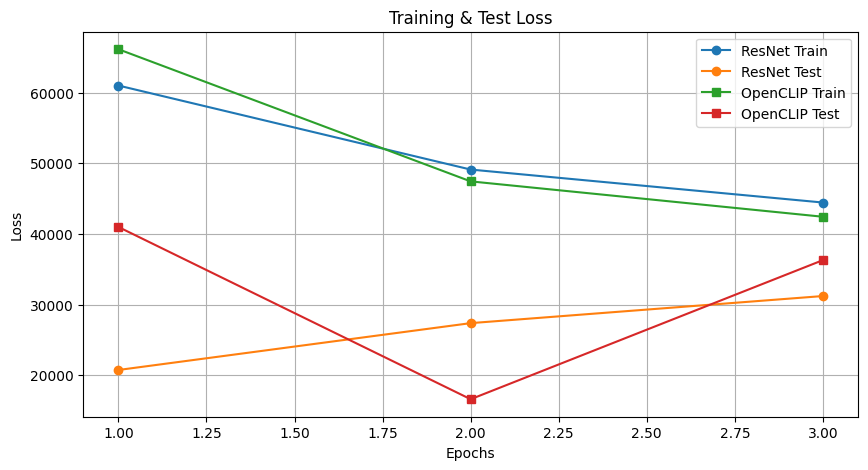

In [71]:
# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), resnet_train_losses, label="ResNet Train", marker='o')
plt.plot(range(1, num_epochs+1), resnet_test_losses, label="ResNet Test", marker='o')
plt.plot(range(1, num_epochs+1), openclip_train_losses, label="OpenCLIP Train", marker='s')
plt.plot(range(1, num_epochs+1), openclip_test_losses, label="OpenCLIP Test", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Test Loss")
plt.legend()
plt.grid()
plt.show()

82576.765625 50100.03515625


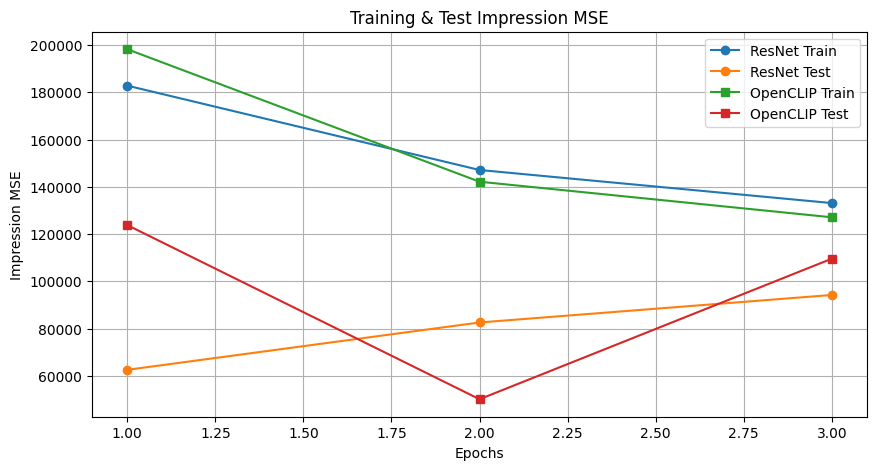

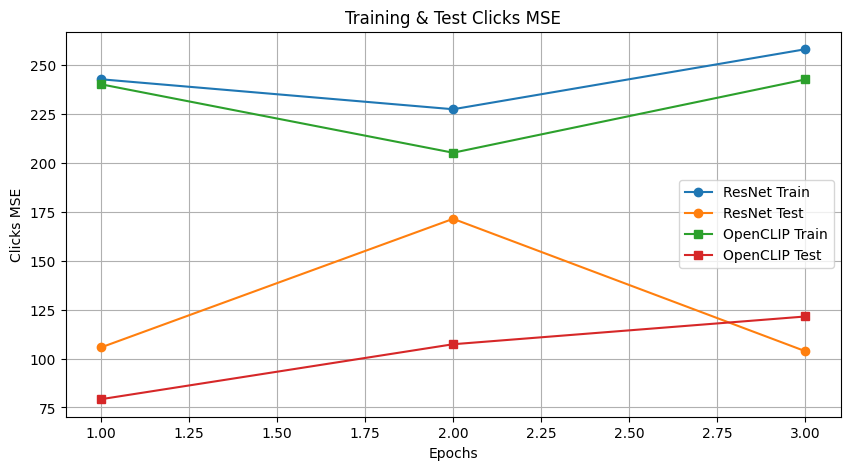

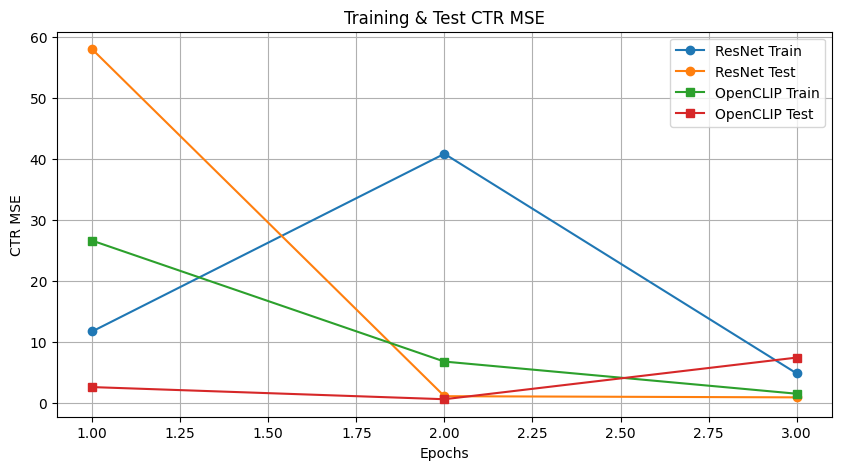

In [88]:
# Plot MSEs
resnet_train_mses, openclip_train_mses, resnet_test_mses, openclip_test_mses = [], [], [], []
for epoch in range(len(resnet_train_labels)):
  resnet_train_mses.append([mean_squared_error(resnet_train_labels[epoch][:, i], resnet_train_preds[epoch][:, i]) for i in range(3)])
  openclip_train_mses.append([mean_squared_error(openclip_train_labels[epoch][:, i], openclip_train_preds[epoch][:, i]) for i in range(3)])
  resnet_test_mses.append([mean_squared_error(resnet_test_labels[epoch][:, i], resnet_test_preds[epoch][:, i]) for i in range(3)])
  openclip_test_mses.append([mean_squared_error(openclip_test_labels[epoch][:, i], openclip_test_preds[epoch][:, i]) for i in range(3)])

print(resnet_test_mses[1][0], openclip_test_mses[1][0])

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), [mses[0] for mses in resnet_train_mses], label="ResNet Train", marker='o')
plt.plot(range(1, num_epochs+1), [mses[0] for mses in resnet_test_mses], label="ResNet Test", marker='o')
plt.plot(range(1, num_epochs+1), [mses[0] for mses in openclip_train_mses], label="OpenCLIP Train", marker='s')
plt.plot(range(1, num_epochs+1), [mses[0] for mses in openclip_test_mses], label="OpenCLIP Test", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Impression MSE")
plt.title("Training & Test Impression MSE")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), [mses[1] for mses in resnet_train_mses], label="ResNet Train", marker='o')
plt.plot(range(1, num_epochs+1), [mses[1] for mses in resnet_test_mses], label="ResNet Test", marker='o')
plt.plot(range(1, num_epochs+1), [mses[1] for mses in openclip_train_mses], label="OpenCLIP Train", marker='s')
plt.plot(range(1, num_epochs+1), [mses[1] for mses in openclip_test_mses], label="OpenCLIP Test", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Clicks MSE")
plt.title("Training & Test Clicks MSE")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), [mses[2] for mses in resnet_train_mses], label="ResNet Train", marker='o')
plt.plot(range(1, num_epochs+1), [mses[2] for mses in resnet_test_mses], label="ResNet Test", marker='o')
plt.plot(range(1, num_epochs+1), [mses[2] for mses in openclip_train_mses], label="OpenCLIP Train", marker='s')
plt.plot(range(1, num_epochs+1), [mses[2] for mses in openclip_test_mses], label="OpenCLIP Test", marker='s')
plt.xlabel("Epochs")
plt.ylabel("CTR MSE")
plt.title("Training & Test CTR MSE")
plt.legend()
plt.grid()
plt.show()

#### Transformer

In [84]:
num_epochs = 3
batch_size = 256
t_resnet_model, t_resnet_train_losses, t_resnet_train_preds, t_resnet_train_labels, t_resnet_test_losses, t_resnet_test_preds, t_resnet_test_labels = train_and_test_model('transformer', resnet_train, resnet_test, num_epochs, batch_size)
t_openclip_model, t_openclip_train_losses, t_openclip_train_preds, t_openclip_train_labels, t_openclip_test_losses, t_openclip_test_preds, t_openclip_test_labels = train_and_test_model('transformer', openclip_train, openclip_test, num_epochs, batch_size)

Training:


100%|██████████| 498/498 [00:13<00:00, 35.64it/s]


Testing:


100%|██████████| 124/124 [00:00<00:00, 170.77it/s]


Epoch 1/3 - Train Loss: 63238.2248 - Test Loss: 29811.3722
Training:


100%|██████████| 498/498 [00:12<00:00, 38.99it/s]


Testing:


100%|██████████| 124/124 [00:00<00:00, 166.65it/s]


Epoch 2/3 - Train Loss: 47284.9126 - Test Loss: 23433.1100
Training:


100%|██████████| 498/498 [00:12<00:00, 39.55it/s]


Testing:


100%|██████████| 124/124 [00:00<00:00, 180.20it/s]


Epoch 3/3 - Train Loss: 43695.4903 - Test Loss: 15560.0828
Training:


100%|██████████| 498/498 [00:09<00:00, 51.18it/s]


Testing:


100%|██████████| 124/124 [00:00<00:00, 202.69it/s]


Epoch 1/3 - Train Loss: 70704.8953 - Test Loss: 24605.4808
Training:


100%|██████████| 498/498 [00:09<00:00, 50.87it/s]


Testing:


100%|██████████| 124/124 [00:00<00:00, 195.45it/s]


Epoch 2/3 - Train Loss: 50841.1769 - Test Loss: 23678.1308
Training:


100%|██████████| 498/498 [00:10<00:00, 46.24it/s]


Testing:


100%|██████████| 124/124 [00:00<00:00, 195.86it/s]

Epoch 3/3 - Train Loss: 44632.9358 - Test Loss: 20689.6052


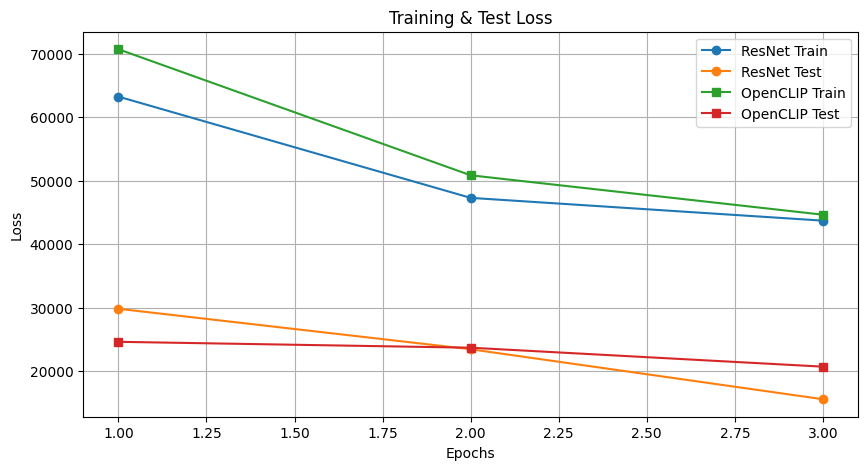

In [85]:
# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), t_resnet_train_losses, label="ResNet Train", marker='o')
plt.plot(range(1, num_epochs+1), t_resnet_test_losses, label="ResNet Test", marker='o')
plt.plot(range(1, num_epochs+1), t_openclip_train_losses, label="OpenCLIP Train", marker='s')
plt.plot(range(1, num_epochs+1), t_openclip_test_losses, label="OpenCLIP Test", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Test Loss")
plt.legend()
plt.grid()
plt.show()

70646.78125 71385.9140625


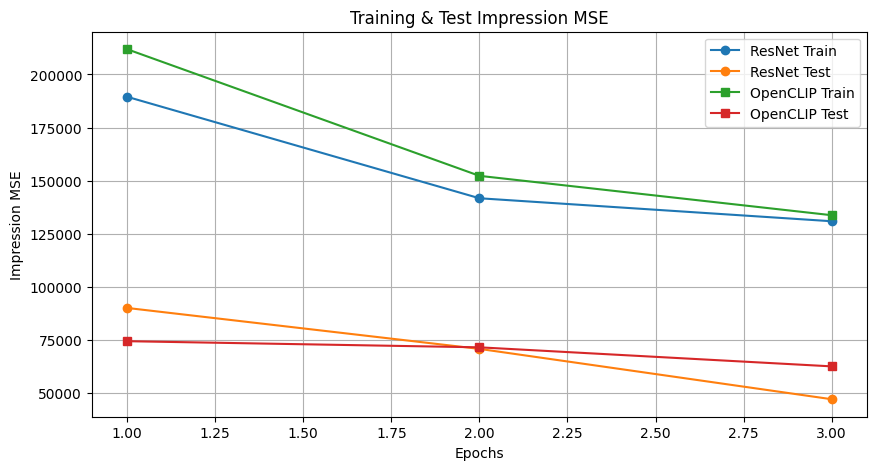

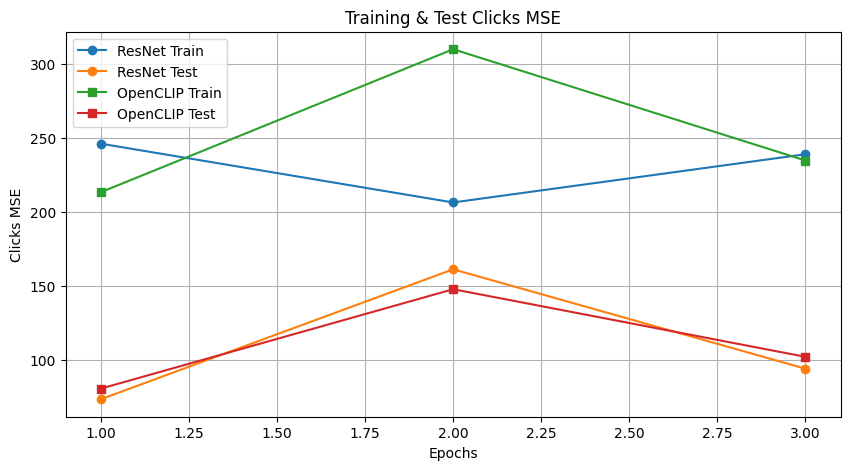

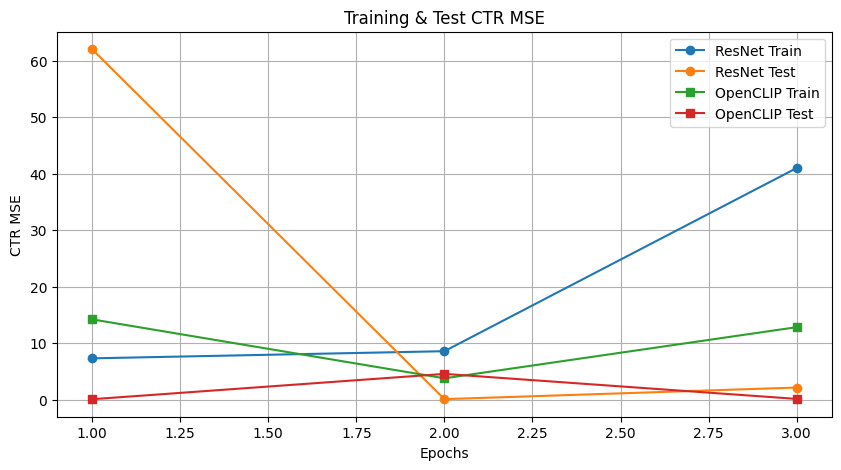

In [87]:
# Plot MSEs
resnet_train_mses, openclip_train_mses, resnet_test_mses, openclip_test_mses = [], [], [], []
for epoch in range(len(t_resnet_train_labels)):
  resnet_train_mses.append([mean_squared_error(t_resnet_train_labels[epoch][:, i], t_resnet_train_preds[epoch][:, i]) for i in range(3)])
  openclip_train_mses.append([mean_squared_error(t_openclip_train_labels[epoch][:, i], t_openclip_train_preds[epoch][:, i]) for i in range(3)])
  resnet_test_mses.append([mean_squared_error(t_resnet_test_labels[epoch][:, i], t_resnet_test_preds[epoch][:, i]) for i in range(3)])
  openclip_test_mses.append([mean_squared_error(t_openclip_test_labels[epoch][:, i], t_openclip_test_preds[epoch][:, i]) for i in range(3)])

print(resnet_test_mses[1][0], openclip_test_mses[1][0])

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), [mses[0] for mses in resnet_train_mses], label="ResNet Train", marker='o')
plt.plot(range(1, num_epochs+1), [mses[0] for mses in resnet_test_mses], label="ResNet Test", marker='o')
plt.plot(range(1, num_epochs+1), [mses[0] for mses in openclip_train_mses], label="OpenCLIP Train", marker='s')
plt.plot(range(1, num_epochs+1), [mses[0] for mses in openclip_test_mses], label="OpenCLIP Test", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Impression MSE")
plt.title("Training & Test Impression MSE")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), [mses[1] for mses in resnet_train_mses], label="ResNet Train", marker='o')
plt.plot(range(1, num_epochs+1), [mses[1] for mses in resnet_test_mses], label="ResNet Test", marker='o')
plt.plot(range(1, num_epochs+1), [mses[1] for mses in openclip_train_mses], label="OpenCLIP Train", marker='s')
plt.plot(range(1, num_epochs+1), [mses[1] for mses in openclip_test_mses], label="OpenCLIP Test", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Clicks MSE")
plt.title("Training & Test Clicks MSE")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), [mses[2] for mses in resnet_train_mses], label="ResNet Train", marker='o')
plt.plot(range(1, num_epochs+1), [mses[2] for mses in resnet_test_mses], label="ResNet Test", marker='o')
plt.plot(range(1, num_epochs+1), [mses[2] for mses in openclip_train_mses], label="OpenCLIP Train", marker='s')
plt.plot(range(1, num_epochs+1), [mses[2] for mses in openclip_test_mses], label="OpenCLIP Test", marker='s')
plt.xlabel("Epochs")
plt.ylabel("CTR MSE")
plt.title("Training & Test CTR MSE")
plt.legend()
plt.grid()
plt.show()

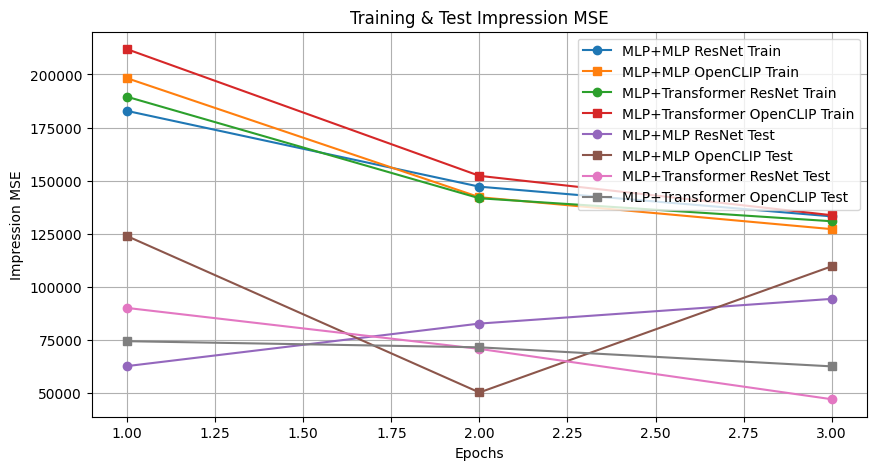

In [91]:
# Plot both Impression MSEs
m_resnet_train_mses, m_openclip_train_mses, m_resnet_test_mses, m_openclip_test_mses = [], [], [], []
for epoch in range(len(resnet_train_labels)):
  m_resnet_train_mses.append([mean_squared_error(resnet_train_labels[epoch][:, i], resnet_train_preds[epoch][:, i]) for i in range(3)])
  m_openclip_train_mses.append([mean_squared_error(openclip_train_labels[epoch][:, i], openclip_train_preds[epoch][:, i]) for i in range(3)])
  m_resnet_test_mses.append([mean_squared_error(resnet_test_labels[epoch][:, i], resnet_test_preds[epoch][:, i]) for i in range(3)])
  m_openclip_test_mses.append([mean_squared_error(openclip_test_labels[epoch][:, i], openclip_test_preds[epoch][:, i]) for i in range(3)])

t_resnet_train_mses, t_openclip_train_mses, t_resnet_test_mses, t_openclip_test_mses = [], [], [], []
for epoch in range(len(t_resnet_train_labels)):
  t_resnet_train_mses.append([mean_squared_error(t_resnet_train_labels[epoch][:, i], t_resnet_train_preds[epoch][:, i]) for i in range(3)])
  t_openclip_train_mses.append([mean_squared_error(t_openclip_train_labels[epoch][:, i], t_openclip_train_preds[epoch][:, i]) for i in range(3)])
  t_resnet_test_mses.append([mean_squared_error(t_resnet_test_labels[epoch][:, i], t_resnet_test_preds[epoch][:, i]) for i in range(3)])
  t_openclip_test_mses.append([mean_squared_error(t_openclip_test_labels[epoch][:, i], t_openclip_test_preds[epoch][:, i]) for i in range(3)])

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), [mses[0] for mses in m_resnet_train_mses], label="MLP+MLP ResNet Train", marker='o')
plt.plot(range(1, num_epochs+1), [mses[0] for mses in m_openclip_train_mses], label="MLP+MLP OpenCLIP Train", marker='s')
plt.plot(range(1, num_epochs+1), [mses[0] for mses in t_resnet_train_mses], label="MLP+Transformer ResNet Train", marker='o')
plt.plot(range(1, num_epochs+1), [mses[0] for mses in t_openclip_train_mses], label="MLP+Transformer OpenCLIP Train", marker='s')
plt.plot(range(1, num_epochs+1), [mses[0] for mses in m_resnet_test_mses], label="MLP+MLP ResNet Test", marker='o')
plt.plot(range(1, num_epochs+1), [mses[0] for mses in m_openclip_test_mses], label="MLP+MLP OpenCLIP Test", marker='s')
plt.plot(range(1, num_epochs+1), [mses[0] for mses in t_resnet_test_mses], label="MLP+Transformer ResNet Test", marker='o')
plt.plot(range(1, num_epochs+1), [mses[0] for mses in t_openclip_test_mses], label="MLP+Transformer OpenCLIP Test", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Impression MSE")
plt.title("Training & Test Impression MSE")
plt.legend()
plt.grid()
plt.show()